# C1DB1B Workshop 2: Data-Driven Decision Making with Trade-offs

**Welcome to Workshop 2!** Today, you'll take a critical step in your analytical journey.

**🎯 Business Scenario:** You have **two datasets** (sick leave + salary) that tell different stories. Different stakeholders interpret them differently. Your job is to **integrate the data, analyze trade-offs, and navigate conflicting evidence**.

**✨ By End of Today:**
- [ ] Load and merge two complex Excel datasets
- [ ] Calculate cost of absence (a key business metric)
- [ ] Analyze trade-offs from multiple stakeholder perspectives
- [ ] Navigate conflicting recommendations
- [ ] Make defensible decisions despite uncertainty

**📖 Learning Approach:** Theory (Why?) → Code (How?) → Decision (So What?)

**⚠️ Key Difference from Workshop 1:**
- Workshop 1: **One dataset** → Simple statistical story
- Workshop 2: **Two datasets** → Complex, potentially conflicting stories
- Real business is always like Workshop 2!

---

## 📚 Conceptual Foundation: Understanding Trade-offs

### What Are Trade-offs?

A **trade-off** occurs when improving one objective requires sacrificing another. In business, trade-offs are unavoidable.

**Examples from healthcare:**
- **Cost vs. Quality:** Hiring cheaper staff (cost savings) vs. experienced staff (better outcomes)
- **Reliability vs. Specialization:** Generalist nurses (stable) vs. specialized nurses (higher absence rates)
- **Efficiency vs. Equity:** Focusing investment on profitable areas vs. serving underserved populations

**Today's Challenge:** The data will show you multiple trade-offs, and different stakeholders will prioritize them differently.

### When Datasets Conflict

Sometimes, data sources point to different conclusions:

| Metric | What It Suggests | Who Cares |
|--------|------------------|-----------|
| **High Sick Leave %** | Less reliable, need bigger buffer | Operations Director |
| **High Salary** | Expensive, high cost of absence | CFO |
| **Both High** | Urgent intervention needed (high cost + high risk) | Board of Directors |
| **Gender Gaps** | Systemic inequality | Equity Officer |

**The Real Skill:** Not choosing one answer, but understanding why different stakeholders reach different conclusions—and making a defensible choice anyway.


---

## 🐍 Part 1: Foundations (15 min - INSTRUCTOR-LED)

### Loading TWO Datasets: The Challenge

In Workshop 1, loading one messy Excel file was complex. Now we'll load two files with different structures and merge them.

**The Key Question:** How do we know which rows match between the two datasets?

**Answer: Keys**

A **key** is one or more columns that uniquely identify a row in a dataset. If two datasets share the same key, we can merge them.

**Our Keys:**
- `group` (Professional group: "A1 Sjuksköterskor", "C1 Läkare", etc.)
- `gender` (Kvinna, Man, Båda könen)
- `year` (2017, 2018, etc.)

**Why This Matters:**
If the keys don't align perfectly (e.g., one dataset says "Nurse" and the other says "Nurses"), the merge will fail silently, producing zero results. This is a critical debugging skill.


<div style='background-color:#f0f8ff;border-left:4px solid #4A90E2;padding:16px;border-radius:8px;margin-bottom:16px;box-shadow:0 2px 4px rgba(0,0,0,0.1);'> <strong style='color:#2D3748;font-size:1.2em;display:block;margin-bottom:12px;'>📚 Importing Python Libraries</strong><p style='color:#4A5568;line-height:1.6;margin-bottom:16px;'>Think of this code as gathering specialized tools for a workshop. Just like a carpenter needs specific tools for different tasks, we need specialized libraries for data analysis. Each library has a specific purpose that makes our work easier and more efficient.</p><div style='background-color:#E6FFFA;padding:12px;border-radius:6px;margin:12px 0;border-left:3px solid #38B2AC;'> <strong style='color:#2C7A7B;'>🧰 Data Analysis Tools</strong> <ul style='margin:8px 0 8px 20px;color:#4A5568;'> <li><b><code>import pandas as pd</code></b>: Pandas is like a super-powered Excel for Python. It helps us work with data tables (called DataFrames), clean data, and perform analysis. We use the nickname <code>pd</code> to save typing - it's like calling "Robert" "Rob" for short.</li> <li><b><code>import numpy as np</code></b>: NumPy is the foundation for mathematical operations. It's excellent for working with arrays (lists of numbers) and performing calculations quickly. The nickname <code>np</code> makes it easier to use.</li> </ul> </div><div style='background-color:#FAF5FF;padding:12px;border-radius:6px;margin:12px 0;border-left:3px solid #9F7AEA;'> <strong style='color:#6B46C1;'>📊 Visualization Tools</strong> <ul style='margin:8px 0 8px 20px;color:#4A5568;'> <li><b><code>import matplotlib.pyplot as plt</code></b>: This is the basic plotting library - think of it as the foundation for creating charts and graphs in Python.</li> <li><b><code>import seaborn as sns</code></b>: Seaborn builds on matplotlib to create more attractive and sophisticated statistical visualizations with less code.</li> <li><b><code>sns.set_style("whitegrid")</code></b>: This sets a clean, professional style for our charts with a white background and grid lines.</li> <li><b><code>plt.rcParams["figure.figsize"] = (12, 6)</code></b>: This sets the default size for our charts to 12 inches wide by 6 inches tall.</li> </ul> </div><div style='background-color:#FFF5F5;padding:12px;border-radius:6px;margin:12px 0;border-left:3px solid #E53E3E;'> <strong style='color:#C53030;'>📈 Statistical Tools</strong> <ul style='margin:8px 0 8px 20px;color:#4A5568;'> <li><b><code>from scipy.stats import norm</code></b>: This imports tools for working with normal distributions (bell curves) from SciPy's statistics module.</li> </ul> </div><div style='background-color:#F0FFF4;padding:10px;border-radius:6px;margin-top:12px;border:1px solid #9AE6B4;'> <strong>✅ Confirmation Message</strong> <p style='margin:8px 0 0 0;color:#4A5568;'><b><code>print("✅ Libraries loaded for Workshop 2")</code></b>: This displays a success message to confirm that all our tools are ready to use. The checkmark emoji (✅) makes it easy to spot that everything loaded correctly.</p> </div></div>

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Configure plotting
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

print("✅ Libraries loaded for Workshop 2")

✅ Libraries loaded for Workshop 2


---

## 📊 Part 2: Load and Merge Datasets (Guided Walkthrough - 35 min)

### Step 1: Load Sick Leave Data (Recap from Workshop 1)

We'll use the cleaned sick leave data from Workshop 1. For this workshop, we'll focus on the most recent complete data: **2017-2018 overlap**.

<div style='background-color:#F5F3FF;border-left:4px solid #8B5CF6;padding:16px;border-radius:8px;margin-bottom:16px;box-shadow:0 2px 4px rgba(0,0,0,0.1);'> <strong style='color:#7C3AED;font-size:1.2em;display:block;margin-bottom:12px;'>🔄 Data Loading & Cleaning Process</strong><p style='color:#4A5568;line-height:1.6;margin-bottom:16px;'>This code transforms a complex Excel file into a clean, analysis-ready dataset. Think of it as translating a messy handwritten document into a organized digital spreadsheet. We're essentially teaching Python how to understand the structure of our data.</p><div style='background-color:#EDE9FE;padding:12px;border-radius:6px;margin:12px 0;border-left:3px solid #8B5CF6;'> <strong style='color:#6D28D9;'>🛡️ Error Handling with Try-Except</strong> <p style='color:#4A5568;margin:8px 0;'><b><code>try:</code></b> and <b><code>except:</code></b> form a safety net for our code. If anything goes wrong during the loading process, Python will jump to the <code>except</code> block and show us a helpful error message instead of crashing completely.</p> </div><div style='background-color:#E0E7FF;padding:12px;border-radius:6px;margin:12px 0;border-left:3px solid #4F46E5;'> <strong style='color:#3730A3;'>📊 Reading Raw Data</strong> <ul style='margin:8px 0 8px 20px;color:#4A5568;'> <li><b><code>pd.read_excel(file_path_sick, sheet_name=0, header=None)</code></b>: Reads the Excel file without assuming any headers exist. The <code>header=None</code> tells pandas "don't treat any row as column names yet."</li> </ul> </div><div style='background-color:#FEF7CD;padding:12px;border-radius:6px;margin:12px 0;border-left:3px solid #EAB308;'> <strong style='color:#854D0E;'>🎯 Pandas Indexing Methods</strong> <p style='color:#4A5568;margin:8px 0;'><b>Three ways to select data in pandas:</b></p> <ul style='margin:8px 0 8px 20px;color:#4A5568;'> <li><b><code>.iloc[]</code></b>: <strong>Integer-based indexing</strong> - selects by row/column numbers. <code>df.iloc[2, 2:]</code> means "get the 3rd row, from the 3rd column to the end" (counting starts at 0).</li> <li><b><code>.loc[]</code></b>: <strong>Label-based indexing</strong> - selects by row/column names. <code>df.loc['row_name', 'column_name']</code>.</li> <li><b><code>df[condition]</code></b>: <strong>Boolean indexing</strong> - filters rows based on conditions. <code>df[df['age_group'] == 'Alla åldrar']</code> keeps only rows where age_group equals "Alla åldrar".</li> </ul> <p style='color:#4A5568;margin:8px 0;font-style:italic;'>In our code: <code>df_raw.iloc[2, 2:].values</code> gets the years from row 3, columns C onward.</p> </div><div style='background-color:#DBEAFE;padding:12px;border-radius:6px;margin:12px 0;border-left:3px solid #3B82F6;'> <strong style='color:#1E40AF;'>🔗 Pairing Data with Zip</strong> <p style='color:#4A5568;margin:8px 0;'><b><code>zip(years_row, genders_row)</code></b>: This function pairs up corresponding elements from two lists. If <code>years_row = [2017, 2018, 2019]</code> and <code>genders_row = ['Women', 'Men', 'Both']</code>, then <code>zip</code> creates pairs: <code>(2017, 'Women'), (2018, 'Men'), (2019, 'Both')</code>.</p> <p style='color:#4A5568;margin:8px 0;'>It's like matching socks - each year gets paired with its corresponding gender label across the spreadsheet columns.</p> </div><div style='background-color:#DCFCE7;padding:12px;border-radius:6px;margin:12px 0;border-left:3px solid #16A34A;'> <strong style='color:#166534;'>🔄 Data Transformation Loop</strong> <ul style='margin:8px 0 8px 20px;color:#4A5568;'> <li><b><code>for row_idx in range(4, len(df_raw)):</code></b>: Loops through each data row starting from row 4. This is where we extract the actual sick leave percentages.</li> <li><b>Dictionary Appending</b>: For each valid data point, we create a dictionary with keys like <code>age_group</code>, <code>year</code>, <code>gender</code>, and <code>sick_leave_percent</code>. This structured approach ensures consistent data organization.</li> </ul> </div><div style='background-color:#FEF3C7;padding:12px;border-radius:6px;margin:12px 0;border-left:3px solid #D97706;'> <strong style='color:#92400E;'>🧹 Data Cleaning Steps</strong> <ul style='margin:8px 0 8px 20px;color:#4A5568;'> <li><b>String to Number Conversion</b>: <code>.str.replace(',', '.')</code> converts European decimal format (5,4) to Python format (5.4), then <code>pd.to_numeric()</code> converts text to actual numbers.</li> <li><b>Data Mapping</b>: <code>.map(translation)</code> efficiently translates Swedish terms to English using a dictionary lookup.</li> <li><b>Missing Data Handling</b>: <code>.dropna()</code> removes rows with missing values, and <code>pd.notna()</code> checks for non-missing values throughout the process.</li> </ul> </div><div style='background-color:#F3E8FF;padding:10px;border-radius:6px;margin-top:12px;border:1px solid #A855F7;'> <strong>🎯 Final Filtering</strong> <p style='margin:8px 0 0 0;color:#4A5568;'><b><code>df_sick_raw[df_sick_raw['age_group'] == 'Alla åldrar']</code></b>: This <strong>boolean indexing</strong> filters our dataset to keep only the "All ages" summary, simplifying our analysis for this workshop while preserving the detailed data for future use.</p> </div><div style='background-color:#F0FFF4;padding:10px;border-radius:6px;margin-top:12px;border:1px solid #9AE6B4;'> <strong>✅ Success Confirmation</strong> <p style='margin:8px 0 0 0;color:#4A5568;'>The final print statements give us a quick overview of our cleaned dataset: number of rows, available years, professional groups, and gender categories - confirming our data is ready for analysis!</p> </div></div>

In [2]:
# If you have the cleaned dataset from Workshop 1, load it
# Otherwise, reload and clean from the raw Excel file

file_path_sick = r"C:\Users\gimb\Documents\teaching\c1db1b\2025\practicals\datasets\dataset1_health_staff_sickleave_HR002_20241118-224047.xlsx"

try:
    # Load raw data
    df_raw = pd.read_excel(file_path_sick, sheet_name=0, header=None)
    
    # Extract headers (same process as Workshop 1)
    years_row = df_raw.iloc[2, 2:].values
    genders_row = df_raw.iloc[3, 2:].values
    
    # Build year-gender pairs
    year_gender_pairs = []
    current_year = None
    for year_val, gender_val in zip(years_row, genders_row):
        if pd.notna(year_val):
            current_year = str(int(float(year_val)))
        if pd.notna(gender_val) and str(gender_val) in ['Kvinna', 'Man', 'Båda könen']:
            if current_year:
                year_gender_pairs.append((current_year, str(gender_val)))
    
    # Extract data
    data_rows = []
    current_age_group = None
    for row_idx in range(4, len(df_raw)):
        row = df_raw.iloc[row_idx]
        if pd.notna(row.iloc[0]):
            current_age_group = str(row.iloc[0]).strip()
        if pd.notna(row.iloc[1]):
            group_name = str(row.iloc[1]).strip()
            values = row.iloc[2:2+len(year_gender_pairs)].values
            for i, (year, gender) in enumerate(year_gender_pairs):
                if i < len(values) and pd.notna(values[i]) and str(values[i]) not in ['..', 'nan']:
                    data_rows.append({
                        'age_group': current_age_group,
                        'group': group_name,
                        'year': year,
                        'gender': gender,
                        'sick_leave_percent': values[i]
                    })
    
    df_sick_raw = pd.DataFrame(data_rows)
    
    # Clean
    df_sick_raw['sick_leave_percent'] = (
        df_sick_raw['sick_leave_percent'].astype(str).str.replace(',', '.')
        .replace('..', np.nan)
    )
    df_sick_raw['sick_leave_percent'] = pd.to_numeric(df_sick_raw['sick_leave_percent'], errors='coerce')
    df_sick_raw['year'] = pd.to_numeric(df_sick_raw['year'], errors='coerce').astype(int)
    
    translation = {'Kvinna': 'Women', 'Man': 'Men', 'Båda könen': 'Both'}
    df_sick_raw['gender'] = df_sick_raw['gender'].map(translation)
    df_sick_raw['group'] = df_sick_raw['group'].str.replace('Alla personalgrupper', 'Samtliga yrkesgrupper')
    df_sick_raw = df_sick_raw.dropna(subset=['year', 'sick_leave_percent', 'gender'])
    
    # Filter to "Alla åldrar" for simplicity in Workshop 2
    df_sick = df_sick_raw[df_sick_raw['age_group'] == 'Alla åldrar'].copy()
    
    print(f"✅ Loaded sick leave data: {len(df_sick)} rows")
    print(f"   Years: {sorted(df_sick['year'].unique())}")
    print(f"   Groups: {df_sick['group'].nunique()} unique professional groups")
    print(f"   Genders: {df_sick['gender'].unique()}")
    print(f"   Genders: {df_sick.head(10)}")
    
except Exception as e:
    print(f"❌ Error loading sick leave data: {e}")

✅ Loaded sick leave data: 791 rows
   Years: [np.int64(2013), np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023)]
   Groups: 24 unique professional groups
   Genders: ['Women' 'Men' 'Both']
   Genders:      age_group                  group  year gender  sick_leave_percent
0  Alla åldrar  Samtliga yrkesgrupper  2013  Women                 6.0
1  Alla åldrar  Samtliga yrkesgrupper  2013    Men                 3.4
2  Alla åldrar  Samtliga yrkesgrupper  2013   Both                 5.5
3  Alla åldrar  Samtliga yrkesgrupper  2014  Women                 6.8
4  Alla åldrar  Samtliga yrkesgrupper  2014    Men                 3.4
5  Alla åldrar  Samtliga yrkesgrupper  2014   Both                 6.1
6  Alla åldrar  Samtliga yrkesgrupper  2015  Women                 7.1
7  Alla åldrar  Samtliga yrkesgrupper  2015    Men                 3.6
8  Alla åldrar  Samtliga yrkesgrupper  2015   Both 


📈 Sick Leave Data Overview (Alternative):


C:\Users\gimb\AppData\Local\Temp\ipykernel_12228\642690292.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_sick, x='year', ax=ax1, palette='viridis', alpha=0.7)


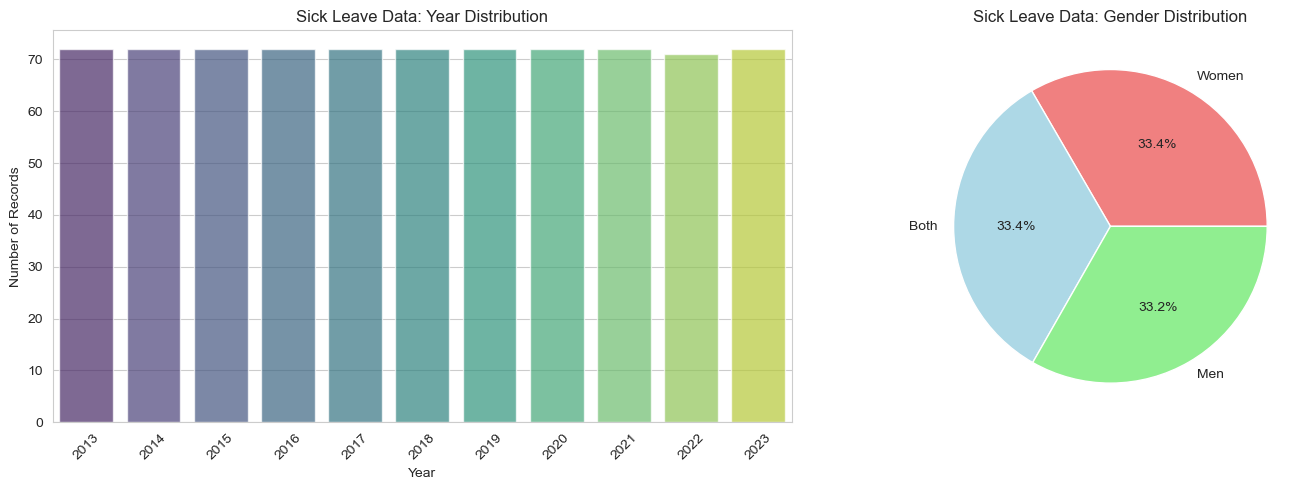

Total professional groups: 24


In [3]:
print("\n📈 Sick Leave Data Overview (Alternative):")

# Alternative approach using seaborn
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Year distribution using seaborn
try:
    sns.countplot(data=df_sick, x='year', ax=ax1, palette='viridis', alpha=0.7)
    ax1.set_title('Sick Leave Data: Year Distribution')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Number of Records')
    ax1.tick_params(axis='x', rotation=45)
except Exception as e:
    ax1.text(0.5, 0.5, f"Error: {e}", transform=ax1.transAxes, ha='center')
    ax1.set_title('Year Distribution - Error')

# Gender distribution
try:
    gender_counts = df_sick['gender'].value_counts()
    wedges, texts, autotexts = ax2.pie(gender_counts.values, 
                                      labels=gender_counts.index, 
                                      autopct='%1.1f%%',
                                      colors=['lightcoral', 'lightblue', 'lightgreen'])
    ax2.set_title('Sick Leave Data: Gender Distribution')
except Exception as e:
    ax2.text(0.5, 0.5, f"Error: {e}", transform=ax2.transAxes, ha='center')
    ax2.set_title('Gender Distribution - Error')

plt.tight_layout()
plt.show()
plt.close()

print(f"Total professional groups: {df_sick['group'].nunique()}")

<div style='background-color:#F5F3FF;border-left:4px solid #8B5CF6;padding:16px;border-radius:8px;margin-bottom:16px;'> <strong style='color:#7C3AED;font-size:1.2em;'>📊 Data Distribution Overview</strong> <p style='color:#4A5568;line-height:1.6;'>This visualization provides an immediate understanding of our dataset's composition. The dual-plot design shows both temporal coverage and demographic representation.</p><div style='background-color:#EDE9FE;padding:12px;border-radius:6px;margin:12px 0;'> <strong>Bar Chart (Left)</strong> <ul style='margin:8px 0 8px 20px;color:#4A5568;'> <li><b>Year Distribution</b>: Shows how many records exist for each year, revealing data completeness and temporal spread</li> <li><b>Pattern Detection</b>: Helps identify if certain years have more/less data collection</li> </ul> </div><div style='background-color:#E0E7FF;padding:12px;border-radius:6px;margin:12px 0;'> <strong>Pie Chart (Right)</strong> <ul style='margin:8px 0 8px 20px;color:#4A5568;'> <li><b>Gender Representation</b>: Visualizes the proportion of data points for each gender category</li> <li><b>Balance Check</b>: Ensures we have adequate representation across demographic groups</li> </ul> </div> </div>


📈 Sick Leave Data Overview (Alternative):


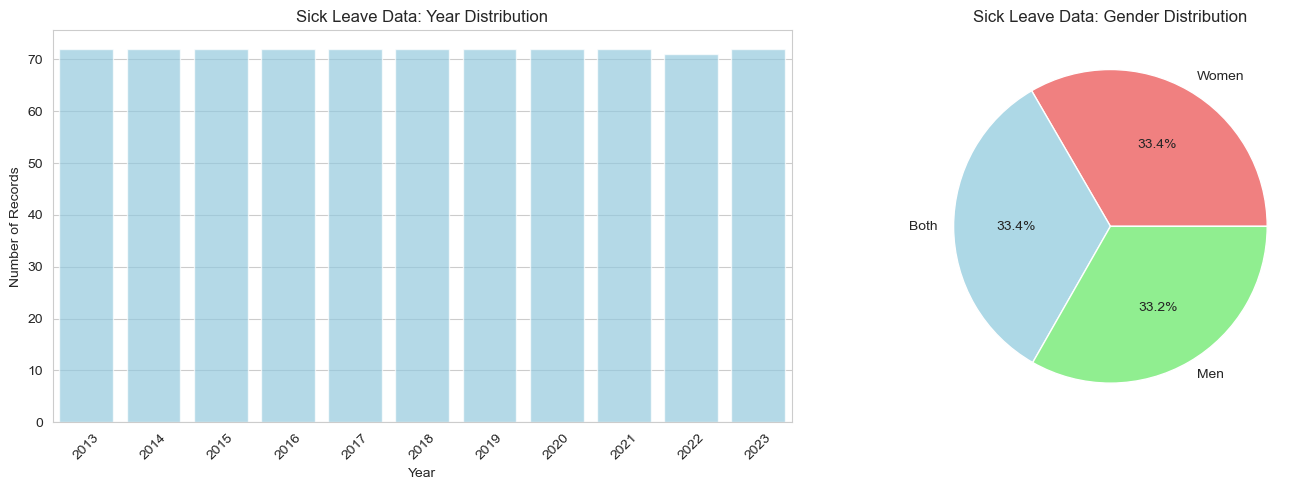

Total professional groups: 24


In [4]:
print("\n📈 Sick Leave Data Overview (Alternative):")

# Alternative approach using seaborn
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Year distribution using seaborn
try:
    sns.countplot(data=df_sick, x='year', ax=ax1, color='skyblue', alpha=0.7)
    ax1.set_title('Sick Leave Data: Year Distribution')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Number of Records')
    ax1.tick_params(axis='x', rotation=45)
except Exception as e:
    ax1.text(0.5, 0.5, f"Error: {e}", transform=ax1.transAxes, ha='center')
    ax1.set_title('Year Distribution - Error')

# Gender distribution
try:
    gender_counts = df_sick['gender'].value_counts()
    wedges, texts, autotexts = ax2.pie(gender_counts.values, 
                                      labels=gender_counts.index, 
                                      autopct='%1.1f%%',
                                      colors=['lightcoral', 'lightblue', 'lightgreen'])
    ax2.set_title('Sick Leave Data: Gender Distribution')
except Exception as e:
    ax2.text(0.5, 0.5, f"Error: {e}", transform=ax2.transAxes, ha='center')
    ax2.set_title('Gender Distribution - Error')

plt.tight_layout()
plt.show()
plt.close()

print(f"Total professional groups: {df_sick['group'].nunique()}")

### Step 2: Load Salary Data (NEW FOR WORKSHOP 2)

Now we'll load the salary dataset using a similar but slightly different parsing approach, since the structure is different.

#### Code Explanation: Parsing the Salary File

The salary file has:
- Row 0: Title
- Row 1: Percentile labels ("10:e percentil", "Medel", "90:e percentil")
- Row 2: Gender labels (Kvinna, Man, Båda könen) repeated 3 times
- Row 3+: Data

We need to build a column mapping that tells us which column contains which salary metric and gender.

<div style='background-color:#F5F3FF;border-left:4px solid #8B5CF6;padding:16px;border-radius:8px;margin-bottom:16px;box-shadow:0 2px 4px rgba(0,0,0,0.1);'> <strong style='color:#7C3AED;font-size:1.2em;display:block;margin-bottom:12px;'>🔍 Understanding Data Structure</strong><p style='color:#4A5568;line-height:1.6;margin-bottom:16px;'>Before loading the salary data, we need to investigate its structure. Think of this as reading the blueprint before building a house - we need to understand how the data is organized before we can extract it properly.</p><div style='background-color:#EDE9FE;padding:12px;border-radius:6px;margin:12px 0;border-left:3px solid #8B5CF6;'> <strong style='color:#6D28D9;'>📁 Loading the Raw File</strong> <ul style='margin:8px 0 8px 20px;color:#4A5568;'> <li><b><code>pd.read_excel(file_path_salary, sheet_name=0, header=None)</code></b>: Loads the Excel file without interpreting any rows as headers. The <code>header=None</code> parameter tells pandas "let us figure out the structure ourselves."</li> </ul> </div><div style='background-color:#E0E7FF;padding:12px;border-radius:6px;margin:12px 0;border-left:3px solid #4F46E5;'> <strong style='color:#3730A3;'>📐 Data Exploration Tools</strong> <ul style='margin:8px 0 8px 20px;color:#4A5568;'> <li><b><code>.shape</code></b>: Returns the dimensions of our DataFrame as (rows, columns). This gives us a quick overview of the data size.</li> <li><b><code>.iloc[0:3, 0:9]</code></b>: Uses <strong>slicing</strong> to select rows 0-2 and columns 0-8. This creates a manageable preview of the top-left corner of our dataset.</li> <li><b><code>display()</code></b>: A Jupyter Notebook function that shows DataFrames in a nicely formatted table. Unlike <code>print()</code>, it preserves the tabular structure for easy reading.</li> </ul> </div><div style='background-color:#FEF7CD;padding:12px;border-radius:6px;margin:12px 0;border-left:3px solid #EAB308;'> <strong style='color:#854D0E;'>🎯 Header Extraction Strategy</strong> <p style='color:#4A5568;margin:8px 0;'><b>Understanding the multi-row header structure:</b></p> <ul style='margin:8px 0 8px 20px;color:#4A5568;'> <li><b><code>df_sal_raw.iloc[2, 2:].values</code></b>: Extracts row 2 (third row) starting from column 2 (third column). This contains salary metrics like "10:e percentil", "Medel", "90:e percentil".</li> <li><b><code>df_sal_raw.iloc[3, 2:].values</code></b>: Extracts row 3 (fourth row) for gender labels like "Kvinna", "Man", "Båda könen".</li> <li><b><code>.values</code></b>: Converts the pandas Series to a simple NumPy array, making it easier to work with.</li> </ul> </div><div style='background-color:#FCE7F3;padding:12px;border-radius:6px;margin:12px 0;border-left:3px solid #DB2777;'> <strong style='color:#9D174D;'>🧼 String Cleaning: str().strip()</strong> <p style='color:#4A5568;margin:8px 0;'><b><code>str(perc_val).strip()</code></b> does two important cleaning steps:</p> <ul style='margin:8px 0 8px 20px;color:#4A5568;'> <li><b><code>str(perc_val)</code></b>: Converts the value to a string. This ensures we're working with text, even if the Excel file contained numbers or other data types.</li> <li><b><code>.strip()</code></b>: Removes any invisible whitespace characters from the beginning and end of the string. This includes spaces, tabs, and newline characters that might have been accidentally included in the Excel file.</li> </ul> <p style='color:#4A5568;margin:8px 0;font-style:italic;'><strong>Example:</strong> If <code>perc_val</code> is <code>" 10:e percentil "</code> (with extra spaces), then <code>str(perc_val).strip()</code> becomes <code>"10:e percentil"</code> (clean and consistent).</p> <p style='color:#4A5568;margin:8px 0;'>This prevents issues like <code>"Medel"</code> and <code>"Medel "</code> (with trailing space) being treated as different values.</p> </div><div style='background-color:#DBEAFE;padding:12px;border-radius:6px;margin:12px 0;border-left:3px solid #3B82F6;'> <strong style='color:#1E40AF;'>🔗 Building Column Mapping with Zip</strong> <p style='color:#4A5568;margin:8px 0;'><b><code>zip(percentile_row, gender_row)</code></b>: Pairs corresponding elements from the percentile and gender rows. For example:</p> <ul style='margin:8px 0 8px 20px;color:#4A5568;'> <li>If <code>percentile_row = ['10:e percentil', '10:e percentil', 'Medel', 'Medel']</code></li> <li>And <code>gender_row = ['Kvinna', 'Man', 'Kvinna', 'Man']</code></li> <li>Then <code>zip</code> creates: <code>('10:e percentil', 'Kvinna'), ('10:e percentil', 'Man'), ('Medel', 'Kvinna'), ('Medel', 'Man')</code></li> </ul> <p style='color:#4A5568;margin:8px 0;'>This creates our "data dictionary" - telling us what each column in the spreadsheet represents.</p> </div><div style='background-color:#DCFCE7;padding:12px;border-radius:6px;margin:12px 0;border-left:3px solid #16A34A;'> <strong style='color:#166534;'>🔄 Smart Header Processing</strong> <ul style='margin:8px 0 8px 20px;color:#4A5568;'> <li><b><code>pd.notna()</code></b>: Checks if a value is not missing (Not-a-Number). Essential for handling sparse headers where labels might be empty in some columns.</li> <li><b>Current Value Tracking</b>: The code remembers the last seen percentile value and applies it to subsequent gender labels until a new percentile appears.</li> <li><b>Validation</b>: Only includes valid gender labels ('Kvinna', 'Man', 'Båda könen') to ensure data quality.</li> </ul> </div><div style='background-color:#F0FFF4;padding:10px;border-radius:6px;margin-top:12px;border:1px solid #9AE6B4;'> <strong>✅ Verification Output</strong> <p style='margin:8px 0 0 0;color:#4A5568;'>The final print statements confirm our understanding by showing how many salary columns we identified and displaying the percentile-gender pairs. This verification step ensures our header parsing worked correctly before proceeding to extract the actual data.</p> </div></div>

In [8]:
file_path_salary = r"C:\Users\gimb\Documents\teaching\c1db1b\2025\practicals\datasets\dataset2_health_staff_salary_HR003_20241118-224457.xlsx"

try:
    # Load raw salary data
    df_sal_raw = pd.read_excel(file_path_salary, sheet_name='HR003', header=None)
    
    print("📊 Salary data structure:")
    print(f"Shape: {df_sal_raw.shape}")
    print(f"\nFirst 3 rows (header structure):")
    display(df_sal_raw.iloc[0:3, 0:9])
    
    # Extract percentile and gender information from headers
    percentile_row = df_sal_raw.iloc[2, 2:].values  # Row 2 has "10:e percentil", "Medel", "90:e percentil"
    gender_row = df_sal_raw.iloc[3, 2:].values      # Row 3 has gender labels
    
    # Build column mapping: which data column corresponds to which metric?
    percentile_gender_pairs = []
    current_percentile = None
    for perc_val, gender_val in zip(percentile_row, gender_row):
        if pd.notna(perc_val):
            current_percentile = str(perc_val).strip()
        if pd.notna(gender_val) and str(gender_val) in ['Kvinna', 'Man', 'Båda könen']:
            if current_percentile:
                percentile_gender_pairs.append((current_percentile, str(gender_val)))
    
    print(f"\n✅ Identified {len(percentile_gender_pairs)} salary columns:")
    print(percentile_gender_pairs)
    
except Exception as e:
    print(f"❌ Error: {e}")

📊 Salary data structure:
Shape: (193, 11)

First 3 rows (header structure):


,0,1,2,3,4,5,6,7,8
0,"Månadslön efter År, Personalgrupp, Inkomstperc...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,10:e percentil,NaN,NaN,Medel,NaN,NaN,90:e percentil



✅ Identified 9 salary columns:
[('10:e percentil', 'Kvinna'), ('10:e percentil', 'Man'), ('10:e percentil', 'Båda könen'), ('Medel', 'Kvinna'), ('Medel', 'Man'), ('Medel', 'Båda könen'), ('90:e percentil', 'Kvinna'), ('90:e percentil', 'Man'), ('90:e percentil', 'Båda könen')]


<div style='background-color:#F5F3FF;border-left:4px solid #8B5CF6;padding:16px;border-radius:8px;margin-bottom:16px;box-shadow:0 2px 4px rgba(0,0,0,0.1);'> <strong style='color:#7C3AED;font-size:1.2em;display:block;margin-bottom:12px;'>🔧 Constructing the Salary Dataset</strong><p style='color:#4A5568;line-height:1.6;margin-bottom:16px;'>Now that we understand the header structure, we systematically extract and transform the raw salary data into a clean, analysis-ready DataFrame. This is like assembling a puzzle - we take scattered pieces of information and organize them into a coherent picture.</p><div style='background-color:#EDE9FE;padding:12px;border-radius:6px;margin:12px 0;border-left:3px solid #8B5CF6;'> <strong style='color:#6D28D9;'>🔄 Row-by-Row Processing</strong> <ul style='margin:8px 0 8px 20px;color:#4A5568;'> <li><b><code>for row_idx in range(4, len(df_sal_raw)):</code></b>: Loops through every data row starting from row 4 (skipping the header rows we already analyzed).</li> <li><b><code>row = df_sal_raw.iloc[row_idx]</code></b>: Grabs each individual row for processing.</li> </ul> </div><div style='background-color:#E0E7FF;padding:12px;border-radius:6px;margin:12px 0;border-left:3px solid #4F46E5;'> <strong style='color:#3730A3;'>📅 Smart Year Tracking</strong> <p style='color:#4A5568;margin:8px 0;'><b>Handling sparse year labels:</b> The Excel file only shows the year once for each block of rows, so we need to remember it:</p> <ul style='margin:8px 0 8px 20px;color:#4A5568;'> <li><b><code>current_year</code></b>: A variable that "remembers" the current year across multiple rows.</li> <li><b><code>int(float(year_val))</code></b>: Converts the year value to integer, handling cases where Excel might store it as float.</li> <li><b>Error Handling</b>: If conversion fails, we keep the previous <code>current_year</code> value.</li> </ul> </div><div style='background-color:#FEF7CD;padding:12px;border-radius:6px;margin:12px 0;border-left:3px solid #EAB308;'> <strong style='color:#854D0E;'>🎯 Data Validation & Cleaning</strong> <ul style='margin:8px 0 8px 20px;color:#4A5568;'> <li><b><code>pd.isna(group_name)</code></b>: Checks if the professional group name is missing.</li> <li><b><code>str(group_name).strip()</code></b>: Cleans whitespace from group names.</li> <li><b>Skip Conditions</b>: Uses <code>continue</code> to skip rows with missing years or invalid group names.</li> </ul> </div><div style='background-color:#DBEAFE;padding:12px;border-radius:6px;margin:12px 0;border-left:3px solid #3B82F6;'> <strong style='color:#1E40AF;'>💰 Salary Value Processing</strong> <p style='color:#4A5568;margin:8px 0;'><b>Extracting and converting salary values:</b></p> <ul style='margin:8px 0 8px 20px;color:#4A5568;'> <li><b><code>row.iloc[2:2+len(percentile_gender_pairs)].values</code></b>: Gets all salary values using the column mapping we created earlier.</li> <li><b><code>enumerate(percentile_gender_pairs)</code></b>: Loops through our header pairs while keeping track of the index position.</li> <li><b>Value Filtering</b>: Skips missing values ('..', 'nan', empty strings, zeros).</li> </ul> </div><div style='background-color:#FCE7F3;padding:12px;border-radius:6px;margin:12px 0;border-left:3px solid #DB2777;'> <strong style='color:#9D174D;'>🛡️ Robust Data Conversion with Try-Except</strong> <p style='color:#4A5568;margin:8px 0;'><b>Safe number conversion:</b></p> <ul style='margin:8px 0 8px 20px;color:#4A5568;'> <li><b><code>str(raw_val).strip().replace(',', '.')</code></b>: Converts European decimal format (5,000.50) to Python format (5000.50).</li> <li><b><code>try: float(val_str)</code></b>: Attempts to convert the cleaned string to a number.</li> <li><b><code>except ValueError: continue</code></b>: If conversion fails (invalid number), skip this value and move to the next without crashing.</li> </ul> <p style='color:#4A5568;margin:8px 0;font-style:italic;">This error handling makes our code robust against unexpected data formats.</p> </div><div style='background-color:#DCFCE7;padding:12px;border-radius:6px;margin:12px 0;border-left:3px solid #16A34A;'> <strong style='color:#166534;'>🌐 Data Standardization</strong> <ul style='margin:8px 0 8px 20px;color:#4A5568;'> <li><b>Percentile Translation</b>: Converts Swedish percentile labels to standardized English codes (P10, Median, P90).</li> <li><b>Gender Translation</b>: Uses dictionary lookup to convert Swedish gender terms to English.</li> <li><b>Structured Records</b>: Creates consistent dictionary objects for each valid data point.</li> </ul> </div><div style='background-color:#F3E8FF;padding:12px;border-radius:6px;margin:12px 0;border-left:3px solid #A855F7;'> <strong style='color:#7C3AED;'>📊 Final DataFrame Assembly</strong> <ul style='margin:8px 0 8px 20px;color:#4A5568;'> <li><b><code>pd.DataFrame(salary_rows)</code></b>: Converts our list of dictionaries into a proper DataFrame.</li> <li><b>Verification Output</b>: Shows summary statistics and a sample of the data for quality checking.</li> <li><b>Detailed Error Reporting</b>: If anything fails, <code>traceback.print_exc()</code> provides detailed error information for debugging.</li> </ul> </div></div>

In [9]:
# Now parse all rows
try:
    salary_rows = []
    current_year = None
    
    for row_idx in range(4, len(df_sal_raw)):
        row = df_sal_raw.iloc[row_idx]
        
        # Column 0: Year
        year_val = row.iloc[0]
        if pd.notna(year_val) and str(year_val) != '..':
            try:
                current_year = int(float(year_val))
            except (ValueError, TypeError):
                current_year = current_year
        if current_year is None:
            continue
        
        # Column 1: Professional group
        group_name = row.iloc[1]
        if pd.isna(group_name) or str(group_name) == '..':
            continue
        group_name = str(group_name).strip()
        
        # Columns 2+: Salary data
        values = row.iloc[2:2+len(percentile_gender_pairs)].values
        
        for i, (percentile, gender_sv) in enumerate(percentile_gender_pairs):
            if i < len(values):
                raw_val = values[i]
                if pd.notna(raw_val) and str(raw_val) not in ['..', 'nan'] and str(raw_val).strip() not in ['0', '']:
                    # Convert to numeric (handle European formatting)
                    val_str = str(raw_val).strip().replace(',', '.')
                    try:
                        salary_val = float(val_str)

                        # Translate percentile names
                        if "10" in percentile:
                            percentile_clean = "P10"
                        elif "Medel" in percentile:
                            percentile_clean = "Median"
                        elif "90" in percentile:
                            percentile_clean = "P90"
                        else:
                            percentile_clean = percentile

                        # Translate gender
                        gender_en = {'Kvinna': 'Women', 'Man': 'Men', 'Båda könen': 'Both'}[gender_sv]

                        salary_rows.append({
                            'year': current_year,
                            'group': group_name,
                            'percentile': percentile_clean,
                            'gender': gender_en,
                            'salary_sek': salary_val
                        })
                    except ValueError:
                        continue

    df_salary = pd.DataFrame(salary_rows)
    
    print(f"✅ Loaded salary data: {len(df_salary)} rows")
    print(f"   Years: {sorted(df_salary['year'].unique())}")
    print(f"   Percentiles: {df_salary['percentile'].unique()}")
    print(f"   Genders: {df_salary['gender'].unique()}")
    print(f"\nSample salary data:")
    display(df_salary.head(10))
    
except Exception as e:
    print(f"❌ Error parsing salary data: {e}")
    import traceback
    traceback.print_exc()

✅ Loaded salary data: 1496 rows
   Years: [np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023)]
   Percentiles: ['P10' 'Median' 'P90']
   Genders: ['Women' 'Men' 'Both']

Sample salary data:


,year,group,percentile,gender,salary_sek
0,2017,Alla personalgrupper,P10,Women,23200.0
1,2017,Alla personalgrupper,P10,Men,23382.0
2,2017,Alla personalgrupper,P10,Both,23200.0
3,2017,Alla personalgrupper,Median,Women,32607.0
4,2017,Alla personalgrupper,Median,Men,40213.0
5,2017,Alla personalgrupper,Median,Both,34217.0
6,2017,Alla personalgrupper,P90,Women,43827.0
7,2017,Alla personalgrupper,P90,Men,72000.0
8,2017,Alla personalgrupper,P90,Both,50635.0
9,2017,A1 Sjuksköterskor,P10,Women,26400.0


### Step 3: Pre-Merge Diagnostics (CRITICAL!)

**This is where beginners make mistakes.** Before merging, you MUST check that the keys align perfectly.

**Common Failure Modes:**
1. Different spellings ("Nurse" vs. "Nurses")
2. Case differences ("WOMEN" vs. "Women")
3. Type mismatches ("2017" vs. 2017)
4. Extra whitespace (" Nurse " vs. "Nurse")

**If keys don't align, the merge produces ZERO results with no warning.**

<div style='background-color:#F5F3FF;border-left:4px solid #8B5CF6;padding:16px;border-radius:8px;margin-bottom:16px;box-shadow:0 2px 4px rgba(0,0,0,0.1);'> <strong style='color:#7C3AED;font-size:1.2em;display:block;margin-bottom:12px;'>🔑 Data Integration Readiness Check</strong><p style='color:#4A5568;line-height:1.6;margin-bottom:16px;'>Before merging our datasets, we perform a comprehensive diagnostic check to ensure they can be properly combined. This is like checking that two puzzle pieces actually fit together before forcing them - it prevents silent failures and ensures accurate results.</p><div style='background-color:#EDE9FE;padding:12px;border-radius:6px;margin:12px 0;border-left:3px solid #8B5CF6;'> <strong style='color:#6D28D9;'>🧹 Data Standardization Function</strong> <p style='color:#4A5568;margin:8px 0;'><b><code>canonical_group_label(label)</code></b>: A custom function that standardizes professional group names:</p> <ul style='margin:8px 0 8px 20px;color:#4A5568;'> <li><b><code>pd.isna(label)</code></b>: First checks if the value is missing</li> <li><b><code>str(label).strip()</code></b>: Converts to string and removes extra whitespace</li> <li><b>Dictionary Replacement</b>: Uses a predefined mapping to fix known inconsistencies between datasets</li> <li><b><code>.get(text, text)</code></b>: Returns the replacement if found, otherwise returns the original text unchanged</li> </ul> <p style='color:#4A5568;margin:8px 0;font-style:italic;">This ensures "B1 Undersköterskor, skötare m.fl." and "B1 Undersköterskor m.fl." are treated as identical.</p> </div><div style='background-color:#E0E7FF;padding:12px;border-radius:6px;margin:12px 0;border-left:3px solid #4F46E5;'> <strong style='color:#3730A3;'>🎯 Creating Clean Group Columns</strong> <ul style='margin:8px 0 8px 20px;color:#4A5568;'> <li><b><code>df_sick.assign(group_clean=...)</code></b>: Creates a new column using simple string stripping</li> <li><b><code>df_salary.assign(group_clean=...)</code></b>: Applies our canonicalization function using <code>.apply()</code></li> <li><b>Method Comparison</b>: Shows two different approaches to data transformation - direct string operations vs. custom function application</li> </ul> </div><div style='background-color:#FEF7CD;padding:12px;border-radius:6px;margin:12px 0;border-left:3px solid #EAB308;'> <strong style='color:#854D0E;'>📅 Year Overlap Analysis</strong> <ul style='margin:8px 0 8px 20px;color:#4A5568;'> <li><b><code>.unique()</code></b>: Gets all distinct years from each dataset</li> <li><b><code>set(sick_years) & set(salary_years)</code></b>: Uses <strong>set intersection</strong> to find common years</li> <li><b>Empty Set Check</b>: Warns if there's no temporal overlap, which would make merging impossible</li> </ul> <p style='color:#4A5568;margin:8px 0;font-style:italic;">This ensures we're analyzing comparable time periods across datasets.</p> </div><div style='background-color:#DBEAFE;padding:12px;border-radius:6px;margin:12px 0;border-left:3px solid #3B82F6;'> <strong style='color:#1E40AF;'>👥 Professional Group Alignment</strong> <p style='color:#4A5568;margin:8px 0;'><b>Comprehensive group matching analysis:</b></p> <ul style='margin:8px 0 8px 20px;color:#4A5568;'> <li><b><code>.dropna().unique()</code></b>: Removes missing values before getting unique groups</li> <li><b>Set Operations</b>: Uses <code>set(A) - set(B)</code> to find groups present in one dataset but missing from the other</li> <li><b>Detailed Reporting</b>: Prints specific group names that don't match, providing actionable information for debugging</li> </ul> </div><div style='background-color:#DCFCE7;padding:12px;border-radius:6px;margin:12px 0;border-left:3px solid #16A34A;'> <strong style='color:#166534;'>⚧️ Gender Category Verification</strong> <ul style='margin:8px 0 8px 20px;color:#4A5568;'> <li><b>Consistency Check</b>: Verifies both datasets use the same gender labeling system</li> <li><b>Simple Comparison</b>: Directly compares the unique gender values from each dataset</li> <li><b>Translation Validation</b>: Confirms our earlier data cleaning translated Swedish terms consistently</li> </ul> </div><div style='background-color:#FCE7F3;padding:12px;border-radius:6px;margin:12px 0;border-left:3px solid #DB2777;'> <strong style='color:#9D174D;'>🔧 Data Type Compatibility</strong> <ul style='margin:8px 0 8px 20px;color:#4A5568;'> <li><b><code>.dtype</code></b>: Checks the data type of key columns</li> <li><b>Merge Readiness</b>: Ensures matching columns have compatible types (e.g., both years are integers)</li> <li><b>Prevention</b>: Catches issues like string years vs. integer years that would cause merge failures</li> </ul> <p style='color:#4A5568;margin:8px 0;font-style:italic;">Different data types in matching columns is a common silent error in data merging.</p> </div></div>

In [10]:
print("🔍 PRE-MERGE DIAGNOSTICS")
print("=" * 60)

def canonical_group_label(label):
    if pd.isna(label):
        return label
    text = str(label).strip()
    text = text.replace(" & ", "/")
    replacements = {
        "B1 Undersköterskor, skötare m.fl.": "B1 Undersköterskor m.fl.",
        "H2 Sjukhustekniker & labpersonal": "H2 Sjukhustekniker/labpersonal",
        "J1 Teknik, hantverkare m.fl.": "J1 Teknik, hantverkare"
    }
    return replacements.get(text, text)

# Ensure both dataframes have a canonical group column for diagnostics
df_sick = df_sick.assign(group_clean=df_sick['group'].str.strip())
df_salary = df_salary.assign(group_clean=df_salary['group'].apply(canonical_group_label))

# 1. Check key domains
print("\n1️⃣ YEAR OVERLAP:")
sick_years = sorted(df_sick['year'].unique())
salary_years = sorted(df_salary['year'].unique())
overlap_years = sorted(set(sick_years) & set(salary_years))

print(f"   Sick leave years: {sick_years}")
print(f"   Salary years: {salary_years}")
print(f"   Overlap: {overlap_years}")

if not overlap_years:
    print("   ❌ WARNING: No year overlap! Merge will be empty.")
else:
    print(f"   ✅ {len(overlap_years)} years of overlap")

# 2. Check professional group alignment
print("\n2️⃣ PROFESSIONAL GROUP ALIGNMENT (canonical groups):")
sick_groups = sorted(df_sick['group_clean'].dropna().unique())
salary_groups = sorted(df_salary['group_clean'].dropna().unique())
matching_groups = sorted(set(sick_groups) & set(salary_groups))

print(f"   Sick leave groups: {len(sick_groups)}")
print(f"   Salary groups: {len(salary_groups)}")
print(f"   Matching groups: {len(matching_groups)}")

print("\n   🔴 Groups in SICK LEAVE but NOT in SALARY:")
for g in sorted(set(sick_groups) - set(salary_groups)):
    print(f"      - {g}")

print("\n   🔴 Groups in SALARY but NOT in SICK LEAVE:")
for g in sorted(set(salary_groups) - set(sick_groups)):
    print(f"      - {g}")

# 3. Check gender alignment
print("\n3️⃣ GENDER ALIGNMENT:")
print(f"   Sick leave genders: {sorted(df_sick['gender'].unique())}")
print(f"   Salary genders: {sorted(df_salary['gender'].unique())}")

# 4. Data type check
print("\n4️⃣ DATA TYPE CHECK:")
print(f"   Sick leave 'year' type: {df_sick['year'].dtype}")
print(f"   Salary 'year' type: {df_salary['year'].dtype}")
print(f"   Sick leave 'group' type: {df_sick['group'].dtype}")
print(f"   Salary 'group' type: {df_salary['group'].dtype}")

🔍 PRE-MERGE DIAGNOSTICS

1️⃣ YEAR OVERLAP:
   Sick leave years: [np.int64(2013), np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023)]
   Salary years: [np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023)]
   Overlap: [np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023)]
   ✅ 7 years of overlap

2️⃣ PROFESSIONAL GROUP ALIGNMENT (canonical groups):
   Sick leave groups: 24
   Salary groups: 24
   Matching groups: 23

   🔴 Groups in SICK LEAVE but NOT in SALARY:
      - Samtliga yrkesgrupper

   🔴 Groups in SALARY but NOT in SICK LEAVE:
      - Alla personalgrupper

3️⃣ GENDER ALIGNMENT:
   Sick leave genders: ['Both', 'Men', 'Women']
   Salary genders: ['Both', 'Men', 'Women']

4️⃣ DATA TYPE CHECK:
   Sick leave 'year' type: int64
   Salary 'year' type: int64
   Sick

<div style='background-color:#F5F3FF;border-left:4px solid #8B5CF6;padding:16px;border-radius:8px;margin-bottom:16px;'> <strong style='color:#7C3AED;font-size:1.2em;'>📈 Merge Compatibility Dashboard</strong> <p style='color:#4A5568;line-height:1.6;'>This comprehensive dashboard provides a visual assessment of dataset compatibility across four critical dimensions, helping students understand merge feasibility at a glance.</p><div style='background-color:#EDE9FE;padding:12px;border-radius:6px;margin:12px 0;'> <strong>Four-Panel Analysis</strong> <ul style='margin:8px 0 8px 20px;color:#1A365D;'> <li><b>Year Coverage</b>: Shows temporal alignment - crucial for time-series analysis</li> <li><b>Group Alignment</b>: Quantifies how many professional groups match between datasets</li> <li><b>Gender Categories</b>: Confirms demographic variable consistency</li> <li><b>Data Volume</b>: Compares overall dataset sizes to set merge expectations</li> </ul> </div><div style='background-color:#E0E7FF;padding:12px;border-radius:6px;margin:12px 0;'> <strong>Visual Merge Readiness</strong> <ul style='margin:8px 0 8px 20px;color:#4A5568;'> <li><b>Quick Assessment</b>: Green bars in group alignment indicate successful matches</li> <li><b>Problem Identification</b>: Red/blue bars highlight potential merge issues</li> <li><b>Proactive Planning</b>: Helps anticipate merge results before execution</li> </ul> </div> </div>


🔗 Merge Compatibility Analysis:


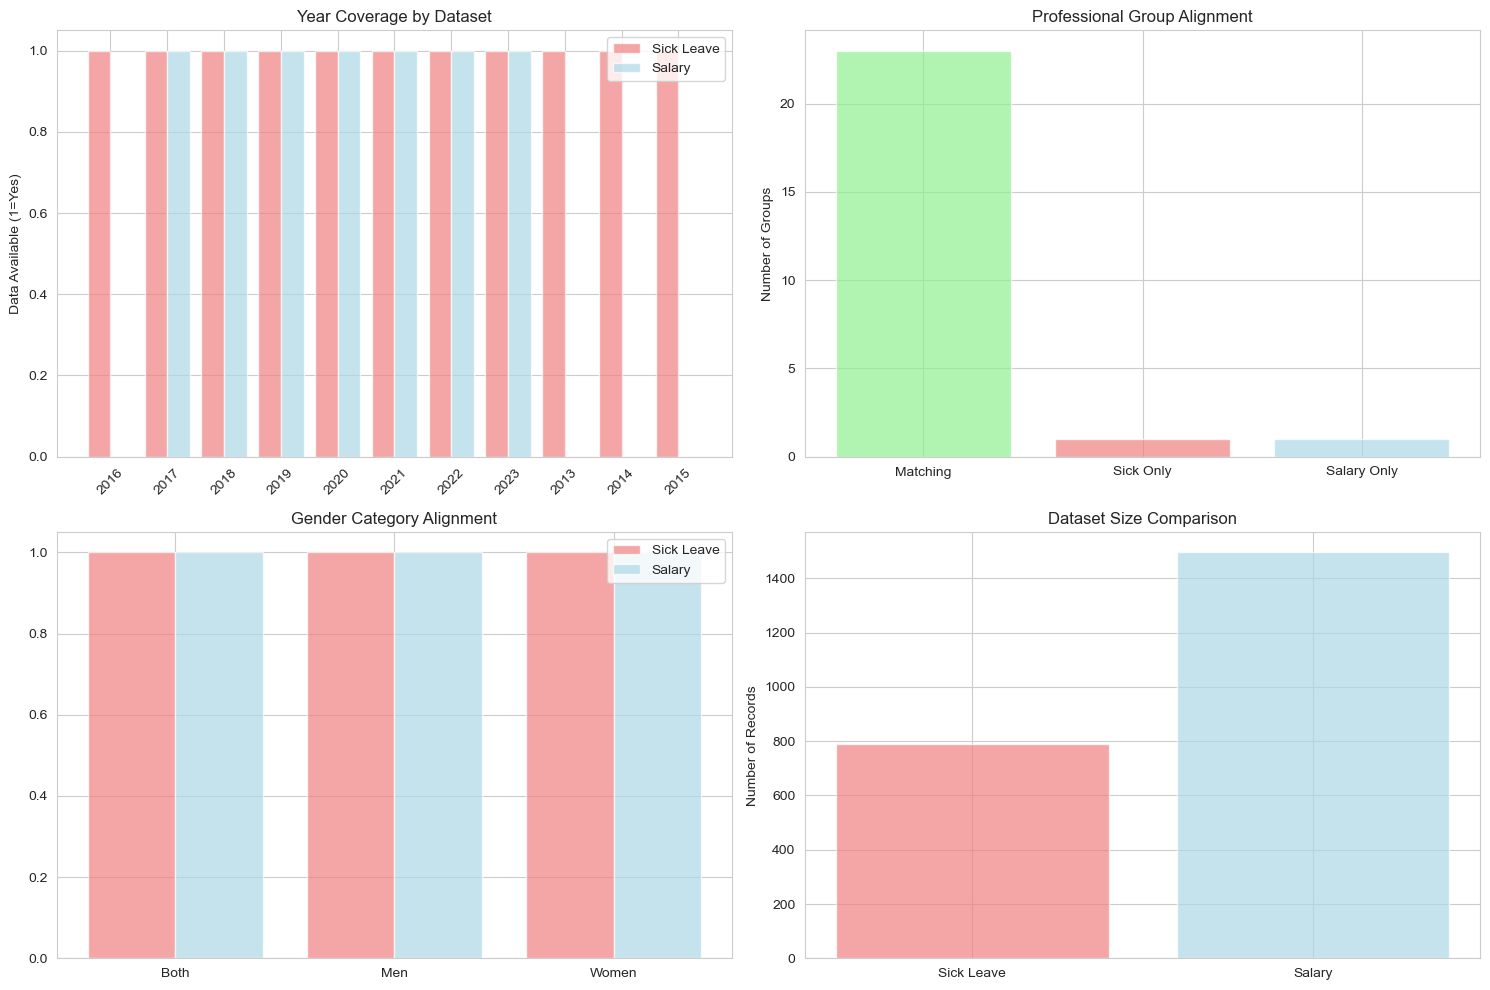

In [11]:
# Add after the pre-merge diagnostics
print("\n🔗 Merge Compatibility Analysis:")
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# 1. Year overlap
years_combined = list(set(sick_years + salary_years))
sick_presence = [1 if y in sick_years else 0 for y in years_combined]
salary_presence = [1 if y in salary_years else 0 for y in years_combined]

x = range(len(years_combined))
ax1.bar(x, sick_presence, color='lightcoral', alpha=0.7, label='Sick Leave', width=0.4)
ax1.bar([i + 0.4 for i in x], salary_presence, color='lightblue', alpha=0.7, label='Salary', width=0.4)
ax1.set_xticks([i + 0.2 for i in x])
ax1.set_xticklabels(years_combined, rotation=45)
ax1.set_title('Year Coverage by Dataset')
ax1.legend()
ax1.set_ylabel('Data Available (1=Yes)')

# 2. Group matching
matching = len(matching_groups)
sick_only = len(set(sick_groups) - set(salary_groups))
salary_only = len(set(salary_groups) - set(sick_groups))

group_data = [matching, sick_only, salary_only]
group_labels = ['Matching', 'Sick Only', 'Salary Only']
colors = ['lightgreen', 'lightcoral', 'lightblue']
ax2.bar(group_labels, group_data, color=colors, alpha=0.7)
ax2.set_title('Professional Group Alignment')
ax2.set_ylabel('Number of Groups')

# 3. Gender alignment
gender_categories = sorted(set(df_sick['gender'].unique()) | set(df_salary['gender'].unique()))
sick_gender_presence = [1 if g in df_sick['gender'].unique() else 0 for g in gender_categories]
salary_gender_presence = [1 if g in df_salary['gender'].unique() else 0 for g in gender_categories]

x_gender = range(len(gender_categories))
ax3.bar(x_gender, sick_gender_presence, color='lightcoral', alpha=0.7, label='Sick Leave', width=0.4)
ax3.bar([i + 0.4 for i in x_gender], salary_gender_presence, color='lightblue', alpha=0.7, label='Salary', width=0.4)
ax3.set_xticks([i + 0.2 for i in x_gender])
ax3.set_xticklabels(gender_categories)
ax3.set_title('Gender Category Alignment')
ax3.legend()

# 4. Data volume comparison
volumes = [len(df_sick), len(df_salary)]
datasets = ['Sick Leave', 'Salary']
ax4.bar(datasets, volumes, color=['lightcoral', 'lightblue'], alpha=0.7)
ax4.set_title('Dataset Size Comparison')
ax4.set_ylabel('Number of Records')

plt.tight_layout()
plt.show()

### Keeping keys aligned before merges
When we merge datasets from different sources we always canonicalize the keys first.
1. Create a helper such as `canonical_group_label()` to normalize variant spellings or punctuation so the same professional group has one representative name.
2. Store the cleaned labels in a new column (`group_clean`) and use it for diagnostics while keeping the raw names intact for auditing.
3. All future comparisons, merges, and filters should reference the canonical label column. That way you compare business logic (e.g., “B1 Undersköterskor m.fl.”) instead of arbitrary formatting quirks.
If a group still appears in only one dataset after normalization, that is a real mismatch to investigate, not a typo you can ignore.

### Step 4: Merge Strategy

Based on diagnostics, we'll:
1. Filter to overlap years (2017-2018)
2. Filter salary to "Median" salary (main metric we'll use)
3. Merge on [year, group, gender]
4. Verify the merge succeeded

<div style='background-color:#F5F3FF;border-left:4px solid #8B5CF6;padding:16px;border-radius:8px;margin-bottom:16px;box-shadow:0 2px 4px rgba(0,0,0,0.1);'> <strong style='color:#7C3AED;font-size:1.2em;display:block;margin-bottom:12px;'>🔄 Data Integration Execution</strong><p style='color:#4A5568;line-height:1.6;margin-bottom:16px;'>Now we combine our sick leave and salary datasets into a single unified table. This merge operation is the foundation for our analysis, allowing us to examine relationships between salary and sick leave patterns.</p><div style='background-color:#EDE9FE;padding:12px;border-radius:6px;margin:12px 0;border-left:3px solid #8B5CF6;'> <strong style='color:#6D28D9;'>🎯 Data Filtering Strategy</strong> <ul style='margin:8px 0 8px 20px;color:#4A5568;'> <li><b><code>df_sick['year'].isin(overlap_years)</code></b>: Uses <strong>boolean indexing</strong> to filter both datasets to only include years that exist in both datasets. This ensures we only try to merge comparable data.</li> <li><b><code>.copy()</code></b>: Creates explicit copies of the filtered data to avoid <strong>chained assignment warnings</strong> and ensure clean, independent DataFrames for merging.</li> <li><b>Salary Specific Filter</b>: <code>df_salary['percentile'] == 'Median'</code> keeps only median salary values, simplifying our analysis to one representative salary measure per group.</li> </ul> </div><div style='background-color:#E0E7FF;padding:12px;border-radius:6px;margin:12px 0;border-left:3px solid #4F46E5;'> <strong style='color:#3730A3;'>🤝 The Merge Operation</strong> <p style='color:#4A5568;margin:8px 0;'><b><code>pd.merge()</code> parameters explained:</b></p> <ul style='margin:8px 0 8px 20px;color:#4A5568;'> <li><b><code>df_sick_filtered, df_salary_filtered</code></b>: The two DataFrames to combine</li> <li><b><code>on=['year', 'group', 'gender']</code></b>: The <strong>join keys</strong> - columns that must match in both datasets</li> <li><b><code>how='inner'</code></b>: Merge type that keeps only rows where keys exist in <strong>both</strong> datasets</li> </ul> <p style='color:#4A5568;margin:8px 0;font-style:italic;">An inner join acts like a Venn diagram intersection - only keeping records that have perfect matches on all specified keys.</p> </div><div style='background-color:#FEF7CD;padding:12px;border-radius:6px;margin:12px 0;border-left:3px solid #EAB308;'> <strong style='color:#854D0E;'>🛡️ Defensive Programming</strong> <ul style='margin:8px 0 8px 20px;color:#4A5568;'> <li><b><code>if merged.empty:</code></b>: Checks if the merge produced zero results, indicating a fundamental problem</li> <li><b>Comprehensive Error Guidance</b>: Provides specific debugging steps for common merge failures: <ul style='margin:8px 0 8px 20px;color:#4A5568;"> <li>Group name inconsistencies</li> <li>Data type mismatches</li> <li>Gender value differences</li> </ul> </li> <li><b>Proactive Problem Solving</b>: Helps students diagnose issues rather than just reporting failure</li> </ul> </div><div style='background-color:#DBEAFE;padding:12px;border-radius:6px;margin:12px 0;border-left:3px solid #3B82F6;'> <strong style='color:#1E40AF;'>✅ Success Validation</strong> <ul style='margin:8px 0 8px 20px;color:#4A5568;'> <li><b>Summary Statistics</b>: Shows key metrics about the merged dataset (years, genders, group count)</li> <li><b><code>display(merged.head())</code></b>: Provides immediate visual confirmation of the merge results</li> <li><b>Data Quality Check</b>: Verifies that the merge preserved the expected structure and relationships</li> </ul> </div><div style='background-color:#DCFCE7;padding:12px;border-radius:6px;margin:12px 0;border-left:3px solid #16A34A;'> <strong style='color:#166534;'>📊 Merge Outcome Analysis</strong> <p style='color:#4A5568;margin:8px 0;'><b>Understanding the result metrics:</b></p> <ul style='margin:8px 0 8px 20px;color:#4A5568;'> <li><b>Row Count</b>: Indicates how many successful matches were found</li> <li><b>Year Range</b>: Confirms temporal alignment</li> <li><b>Group Count</b>: Validates that professional groups merged correctly</li> <li><b>Sample Data</b>: Allows visual inspection of the combined sick leave and salary values</li> </ul> </div></div>

In [12]:
print("🔗 MERGING DATASETS")
print("=" * 60)

# Filter to overlap years
df_sick_filtered = df_sick[df_sick['year'].isin(overlap_years)].copy()
df_salary_filtered = df_salary[(df_salary['year'].isin(overlap_years)) & 
                               (df_salary['percentile'] == 'Median')].copy()

print(f"\nAfter year filtering:")
print(f"  Sick leave: {len(df_sick_filtered)} rows")
print(f"  Salary (Median only): {len(df_salary_filtered)} rows")

# Perform merge
merged = pd.merge(
    df_sick_filtered,
    df_salary_filtered,
    on=['year', 'group', 'gender'],
    how='inner'
)

print(f"\n✅ Merge result: {len(merged)} rows")

if merged.empty:
    print("\n❌ ERROR: Merge produced zero results!")
    print("Debugging steps:")
    print("  1. Check group names for typos or spacing differences")
    print("  2. Ensure year columns are the same type")
    print("  3. Verify gender values match exactly")
else:
    print(f"   Years: {sorted(merged['year'].unique())}")
    print(f"   Genders: {sorted(merged['gender'].unique())}")
    print(f"   Groups: {merged['group'].nunique()}")
    print(f"\nFirst 5 rows of merged data:")
    display(merged.head())

🔗 MERGING DATASETS

After year filtering:
  Sick leave: 503 rows
  Salary (Median only): 502 rows

✅ Merge result: 471 rows
   Years: [np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023)]
   Genders: ['Both', 'Men', 'Women']
   Groups: 23

First 5 rows of merged data:


,age_group,group,year,gender,sick_leave_percent,group_clean_x,percentile,salary_sek,group_clean_y
0,Alla åldrar,A1 Sjuksköterskor,2017,Women,6.5,A1 Sjuksköterskor,Median,32017.0,A1 Sjuksköterskor
1,Alla åldrar,A1 Sjuksköterskor,2017,Men,3.9,A1 Sjuksköterskor,Median,32037.0,A1 Sjuksköterskor
2,Alla åldrar,A1 Sjuksköterskor,2017,Both,6.2,A1 Sjuksköterskor,Median,32019.0,A1 Sjuksköterskor
3,Alla åldrar,A1 Sjuksköterskor,2018,Women,6.9,A1 Sjuksköterskor,Median,32662.0,A1 Sjuksköterskor
4,Alla åldrar,A1 Sjuksköterskor,2018,Men,3.5,A1 Sjuksköterskor,Median,32631.0,A1 Sjuksköterskor


---

## 💼 Part 3: Your Turn - Trade-off Analysis Scenarios (55 min)

Now that we have integrated data, we can answer real business questions that REQUIRE both datasets.

### 🎯 Scenario 2.1: Wellness Program Investment Decision

**Business Context:**
Your facility has **500,000 SEK** to invest in ONE targeted occupational health intervention. Which professional group should you target?

**The Complication:**
Different stakeholders analyze the SAME merged data but reach DIFFERENT conclusions based on what they prioritize.

#### Who Are the Stakeholders?

1. **Operations Director** - "I care about RELIABILITY"
   - Priority: Keep staffing predictable
   - Metric: Lowest sick leave %
   - Logic: "Target the worst offenders to improve operation stability"

2. **CFO** - "I care about ROI"
   - Priority: Maximize cost savings
   - Metric: Highest cost of absence
   - Formula: Cost = Salary × Sick leave %
   - Logic: "Where's the biggest financial impact?"

3. **HR Director** - "I care about WELLBEING & TRENDS"
   - Priority: Early intervention
   - Metric: Steepest increasing trend (2017 → 2018)
   - Logic: "Prevent problems before they escalate"

4. **Equity Officer** - "I care about FAIRNESS"
   - Priority: Address systemic gaps
   - Metric: Largest gender disparities
   - Logic: "Which group suffers the most inequality?"

**Your Task:** Calculate the recommendation from each perspective, then choose your OWN.

div style='background-color:#F5F3FF;border-left:4px solid #8B5CF6;padding:16px;border-radius:8px;margin-bottom:16px;box-shadow:0 2px 4px rgba(0,0,0,0.1);'> <strong style='color:#7C3AED;font-size:1.2em;display:block;margin-bottom:12px;'>🔬 Multi-Stakeholder Analytical Framework</strong><p style='color:#4A5568;line-height:1.6;margin-bottom:16px;'>This comprehensive analysis calculates key performance metrics tailored to different stakeholder perspectives. Instead of separate analyses, we build a unified engine that generates insights for Operations, Finance, HR, and Equity stakeholders simultaneously.</p><div style='background-color:#EDE9FE;padding:12px;border-radius:6px;margin:12px 0;border-left:3px solid #8B5CF6;'> <strong style='color:#6D28D9;'>🔄 Group-Level Analysis Loop</strong> <ul style='margin:8px 0 8px 20px;color:#4A5568;'> <li><b><code>for group in sorted(merged['group'].unique()):</code></b>: Iterates through each professional group alphabetically. The <code>sorted()</code> function ensures consistent ordering.</li> <li><b><code>group_data = merged[merged['group'] == group]</code></b>: Creates a subset DataFrame containing only data for the current group using <strong>boolean filtering</strong>.</li> </ul> </div><div style='background-color:#E0E7FF;padding:12px;border-radius:6px;margin:12px 0;border-left:3px solid #4F46E5;'> <strong style='color:#3730A3;'>💰 Financial Impact Calculations</strong> <ul style='margin:8px 0 8px 20px;color:#4A5568;'> <li><b><code>mean_sl = group_data['sick_leave_percent'].mean()</code></b>: Calculates average sick leave percentage across all years and genders</li> <li><b><code>median_salary = group_data['salary_sek'].median()</code></b>: Uses median salary as a robust measure of central tendency</li> <li><b><code>monthly_cost = median_salary * mean_sl / 100</code></b>: Computes monthly financial impact (salary × absence rate)</li> <li><b><code>annual_cost = monthly_cost * 12</code></b>: Scales to annual cost for budgeting purposes</li> </ul> </div><div style='background-color:#FEF7CD;padding:12px;border-radius:6px;margin:12px 0;border-left:3px solid #EAB308;'> <strong style='color:#854D0E;'>📈 Trend Analysis</strong> <ul style='margin:8px 0 8px 20px;color:#4A5568;'> <li><b>Yearly Comparison</b>: Extracts 2017 and 2018 data using conditional filtering</li> <li><b><code>.values</code></b>: Converts pandas Series to NumPy arrays for direct element access</li> <li><b>Length Validation</b>: Checks that both years have data before calculating trends</li> <li><b>Direction Interpretation</b>: Positive trend = worsening absence rates</li> </ul> </div><div style='background-color:#DBEAFE;padding:12px;border-radius:6px;margin:12px 0;border-left:3px solid #3B82F6;'> <strong style='color:#1E40AF;'>⚖️ Gender Equity Analysis</strong> <p style='color:#4A5568;margin:8px 0;'><b>Comprehensive gender gap calculations:</b></p> <ul style='margin:8px 0 8px 20px;color:#4A5568;'> <li><b>Absence Gap</b>: <code>women_sl - men_sl</code> (positive = women have higher absence)</li> <li><b>Pay Gap (Absolute)</b>: <code>men_sal - women_sal</code> (positive = men earn more)</li> <li><b>Pay Gap (Percentage)</b>: <code>(pay_gap_sek / women_sal * 100)</code> calculates relative difference</li> <li><b>Division Safety</b>: Includes <code>if women_sal > 0</code> check to prevent division by zero</li> </ul> </div><div style='background-color:#DCFCE7;padding:12px;border-radius:6px;margin:12px 0;border-left:3px solid #16A34A;'> <strong style='color:#166534;'>🗂️ Structured Data Collection</strong> <ul style='margin:8px 0 8px 20px;color:#4A5568;'> <li><b>Dictionary Appending</b>: Each group's metrics are stored as a dictionary with descriptive key names</li> <li><b>Consistent Structure</b>: All groups follow the same metric format for easy comparison</li> <li><b><code>pd.DataFrame(analysis_data)</code></b>: Converts the list of dictionaries into a structured analysis table</li> </ul> </div><div style='background-color:#FCE7F3;padding:12px;border-radius:6px;margin:12px 0;border-left:3px solid #DB2777;'> <strong style='color:#9D174D;'>🎯 Stakeholder-Specific Recommendations</strong> <p style='color:#4A5568;margin:8px 0;'><b>Using pandas indexing for optimal selection:</b></p> <ul style='margin:8px 0 8px 20px;color:#4A5568;'> <li><b><code>.idxmin()</code></b>: Finds the index of the minimum value in a column</li> <li><b><code>.idxmax()</code></b>: Finds the index of the maximum value in a column</li> <li><b><code>.loc[]</code></b>: Retrieves the complete row using the identified index</li> <li><b>Contextual Interpretation</b>: Each recommendation includes explanatory metrics and status indicators</li> </ul> </div><div style='background-color:#F3E8FF;padding:12px;border-radius:6px;margin:12px 0;border-left:3px solid #A855F7;'> <strong style='color:#7C3AED;'>🤝 Consensus Analysis</strong> <ul style='margin:8px 0 8px 20px;color:#4A5568;'> <li><b>Dictionary Aggregation</b>: Collects all stakeholder recommendations in one structure</li> <li><b><code>set(recommendations.values())</code></b>: Uses set theory to identify unique recommendations</li> <li><b>Consensus Detection</b>: Single unique value = unanimous agreement; multiple values = conflict</li> <li><b>Decision Guidance</b>: Provides clear next steps based on agreement level</li> </ul> </div></div>

In [13]:
print("=" * 70)
print("SCENARIO 2.1: WELLNESS PROGRAM INVESTMENT DECISION")
print("=" * 70)

# Create our analysis dataset
# For each group, we'll calculate: mean sick leave, median salary, cost of absence, gender gaps

analysis_data = []

for group in sorted(merged['group'].unique()):
    group_data = merged[merged['group'] == group]
    
    # Calculate group-level metrics (both genders)
    mean_sl = group_data['sick_leave_percent'].mean()
    median_salary = group_data['salary_sek'].median()
    monthly_cost = median_salary * mean_sl / 100
    annual_cost = monthly_cost * 12
    
    # Trend (2017 to 2018)
    data_2017 = group_data[group_data['year'] == 2017]['sick_leave_percent'].values
    data_2018 = group_data[group_data['year'] == 2018]['sick_leave_percent'].values
    
    if len(data_2017) > 0 and len(data_2018) > 0:
        trend = data_2018[0] - data_2017[0]  # Positive = worsening
    else:
        trend = 0
    
    # Gender gap (Women - Men)
    women_data = group_data[group_data['gender'] == 'Women']
    men_data = group_data[group_data['gender'] == 'Men']
    
    if len(women_data) > 0 and len(men_data) > 0:
        women_sl = women_data['sick_leave_percent'].mean()
        men_sl = men_data['sick_leave_percent'].mean()
        absence_gap = women_sl - men_sl
        
        women_sal = women_data['salary_sek'].mean()
        men_sal = men_data['salary_sek'].mean()
        pay_gap_sek = men_sal - women_sal
        pay_gap_pct = (pay_gap_sek / women_sal * 100) if women_sal > 0 else 0
    else:
        absence_gap = 0
        pay_gap_sek = 0
        pay_gap_pct = 0
    
    analysis_data.append({
        'group': group,
        'mean_sick_leave': mean_sl,
        'median_salary': median_salary,
        'monthly_absence_cost': monthly_cost,
        'annual_absence_cost': annual_cost,
        'trend_2017_2018': trend,
        'absence_gap_women_minus_men': absence_gap,
        'pay_gap_sek_men_minus_women': pay_gap_sek,
        'pay_gap_pct': pay_gap_pct
    })

df_analysis = pd.DataFrame(analysis_data)

print("\n📊 COMPLETE ANALYSIS TABLE:")
display(df_analysis.round(2))

print("\n" + "=" * 70)
print("STAKEHOLDER RECOMMENDATIONS")
print("=" * 70)

# Perspective A: Operations (lowest sick leave)
print("\n🏢 PERSPECTIVE A: Operations Director")
print("   'I want the MOST RELIABLE group (lowest sick leave)'")
most_reliable = df_analysis.loc[df_analysis['mean_sick_leave'].idxmin()]
print(f"   Recommendation: {most_reliable['group']}")
print(f"   Sick leave: {most_reliable['mean_sick_leave']:.1f}%")

# Perspective B: Finance (highest cost)
print("\n💰 PERSPECTIVE B: CFO")
print("   'I want the HIGHEST COST group (maximum ROI potential)'")
highest_cost = df_analysis.loc[df_analysis['annual_absence_cost'].idxmax()]
print(f"   Recommendation: {highest_cost['group']}")
print(f"   Annual cost: {highest_cost['annual_absence_cost']:,.0f} SEK")
print(f"   (Salary: {highest_cost['median_salary']:,.0f} SEK/month × Sick leave: {highest_cost['mean_sick_leave']:.1f}%)")

# Perspective C: HR (steepest trend)
print("\n👥 PERSPECTIVE C: HR Director")
print("   'I want the group with WORSENING trends (early intervention)'")
worst_trend = df_analysis.loc[df_analysis['trend_2017_2018'].idxmax()]
print(f"   Recommendation: {worst_trend['group']}")
print(f"   Trend (2017→2018): {worst_trend['trend_2017_2018']:+.2f} percentage points")
if worst_trend['trend_2017_2018'] > 0:
    print(f"   Status: ❌ WORSENING (sick leave increasing)")
elif worst_trend['trend_2017_2018'] < 0:
    print(f"   Status: ✅ IMPROVING (sick leave decreasing)")
else:
    print(f"   Status: → STABLE")

# Perspective D: Equity (largest absence gap)
print("\n⚖️ PERSPECTIVE D: Equity Officer")
print("   'I want the group with LARGEST gender absence gap (fairness)'")
largest_gap = df_analysis.loc[df_analysis['absence_gap_women_minus_men'].idxmax()]
print(f"   Recommendation: {largest_gap['group']}")
print(f"   Absence gap (Women - Men): {largest_gap['absence_gap_women_minus_men']:+.1f} percentage points")
print(f"   (Women: {largest_gap['mean_sick_leave']:+.1f}%, need to calculate men's rate)")

print("\n" + "=" * 70)
print("ANALYSIS: Do the perspectives agree?")
print("=" * 70)

recommendations = {
    'Operations': most_reliable['group'],
    'Finance': highest_cost['group'],
    'HR/Trends': worst_trend['group'],
    'Equity': largest_gap['group']
}

print("\nRecommendations by stakeholder:")
for stakeholder, rec in recommendations.items():
    print(f"  {stakeholder:15} → {rec}")

if len(set(recommendations.values())) == 1:
    print("\n✅ UNANIMOUS AGREEMENT! All stakeholders recommend the same group.")
else:
    print(f"\n❌ CONFLICT! Stakeholders disagree on which group to target.")
    print(f"   This requires negotiation and senior management decision-making.")

SCENARIO 2.1: WELLNESS PROGRAM INVESTMENT DECISION

📊 COMPLETE ANALYSIS TABLE:


,group,mean_sick_leave,median_salary,monthly_absence_cost,annual_absence_cost,trend_2017_2018,absence_gap_women_minus_men,pay_gap_sek_men_minus_women,pay_gap_pct
0,A1 Sjuksköterskor,7.57,34428.0,2606.69,31280.30,0.4,1.51,-34.00,-0.10
1,A2 Barnmorskor,7.15,38473.5,2750.86,33010.26,0.4,-2.38,-1649.68,-4.20
2,B1 Undersköterskor m.fl.,10.86,26235.0,2847.95,34175.46,-0.7,0.97,-808.50,-3.03
3,C1 Läkare,4.30,61107.0,2630.51,31566.13,-0.4,1.16,3219.71,5.38
4,D1 Tandläkare,6.32,49797.0,3149.07,37788.81,-0.3,1.69,1789.43,3.68
5,E1 Tandsköterskor m.fl.,8.09,28380.0,2294.73,27536.71,0.2,1.34,-793.57,-2.80
6,E2 Tandhygienister,7.69,31933.0,2454.28,29451.35,-0.8,0.00,-2469.00,-7.51
7,"F1 Administratör, vård",9.59,26357.0,2526.51,30318.08,0.2,1.91,-2470.57,-9.12
8,G1 Psykolog,7.75,40586.0,3144.45,37733.38,-0.6,1.53,-415.43,-1.02
9,G2 Psykoterapeut,5.54,42567.0,2359.43,28313.14,-4.1,1.17,-106.57,-0.25



STAKEHOLDER RECOMMENDATIONS

🏢 PERSPECTIVE A: Operations Director
   'I want the MOST RELIABLE group (lowest sick leave)'
   Recommendation: L1 Ledningsarbete
   Sick leave: 2.2%

💰 PERSPECTIVE B: CFO
   'I want the HIGHEST COST group (maximum ROI potential)'
   Recommendation: D1 Tandläkare
   Annual cost: 37,789 SEK
   (Salary: 49,797 SEK/month × Sick leave: 6.3%)

👥 PERSPECTIVE C: HR Director
   'I want the group with WORSENING trends (early intervention)'
   Recommendation: A1 Sjuksköterskor
   Trend (2017→2018): +0.40 percentage points
   Status: ❌ WORSENING (sick leave increasing)

⚖️ PERSPECTIVE D: Equity Officer
   'I want the group with LARGEST gender absence gap (fairness)'
   Recommendation: G6 Dietist
   Absence gap (Women - Men): +2.7 percentage points
   (Women: +5.3%, need to calculate men's rate)

ANALYSIS: Do the perspectives agree?

Recommendations by stakeholder:
  Operations      → L1 Ledningsarbete
  Finance         → D1 Tandläkare
  HR/Trends       → A1 Sjuksköte

<div style='background-color:#F5F3FF;border-left:4px solid #8B5CF6;padding:16px;border-radius:8px;margin-bottom:16px;'> <strong style='color:#7C3AED;font-size:1.2em;'>🎯 Multi-Perspective Decision Dashboard</strong> <p style='color:#4A5568;line-height:1.6;'>This comprehensive visualization suite transforms abstract analysis into concrete, comparable insights across all stakeholder perspectives.</p><div style='background-color:#EDE9FE;padding:12px;border-radius:6px;margin:12px 0;'> <strong>Four-View Analysis</strong> <ul style='margin:8px 0 8px 20px;color:#4A5568;'> <li><b>Operations Perspective</b>: Horizontal bar chart highlighting groups with lowest sick leave</li> <li><b>Finance Perspective</b>: Cost-focused view emphasizing highest financial impact</li> <li><b>HR Perspective</b>: Trend analysis showing groups with deteriorating conditions</li> <li><b>Equity Perspective</b>: Gender gap visualization identifying largest disparities</li> </ul> </div><div style='background-color:#E0E7FF;padding:12px;border-radius:6px;margin:12px 0;'> <strong>Visual Design Features</strong> <ul style='margin:8px 0 8px 20px;color:#4A5568;'> <li><b>Color Coding</b>: Each stakeholder has distinct colors for quick recognition</li> <li><b>Highlighting</b>: Recommended groups stand out in vibrant colors</li> <li><b>Reference Lines</b>: Average lines and zero lines provide context</li> <li><b>Horizontal Layout</b>: Group names remain readable on y-axis</li> </ul> </div><div style='background-color:#DCFCE7;padding:12px;border-radius:6px;margin:12px 0;'> <strong>Consensus Matrix</strong> <ul style='margin:8px 0 8px 20px;color:#4A5568;'> <li><b>Agreement Visualization</strong>: Clearly shows if stakeholders converge on one group</li> <li><b>Conflict Identification</strong>: Reveals when different perspectives lead to different recommendations</li> <li><b>Decision Support</strong>: Provides visual evidence for final recommendation justification</li> </ul> </div> </div>


🎯 Stakeholder Recommendation Comparison:


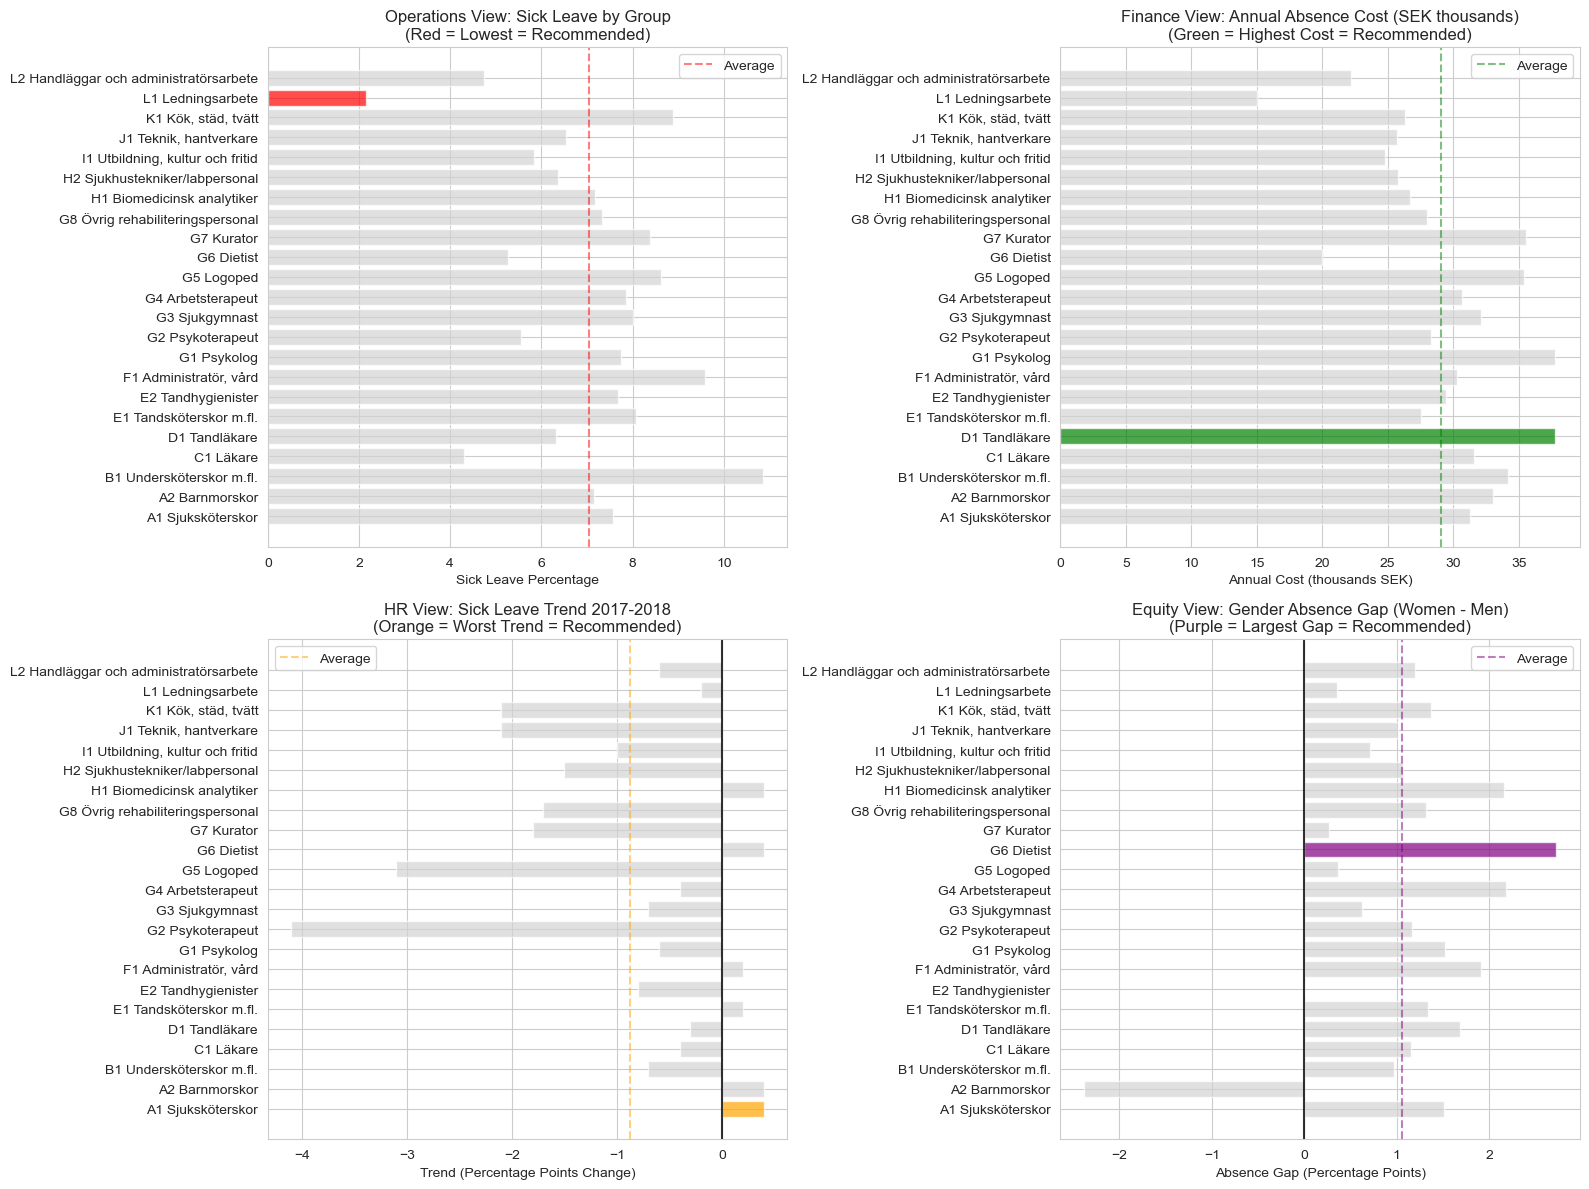


🤝 Stakeholder Consensus Analysis:


C:\Users\gimb\AppData\Local\Temp\ipykernel_12228\4058551267.py:77: UserWarning: Glyph 10003 (\N{CHECK MARK}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\gimb\AppData\Local\anaconda3\envs\rtxgpu311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 10003 (\N{CHECK MARK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


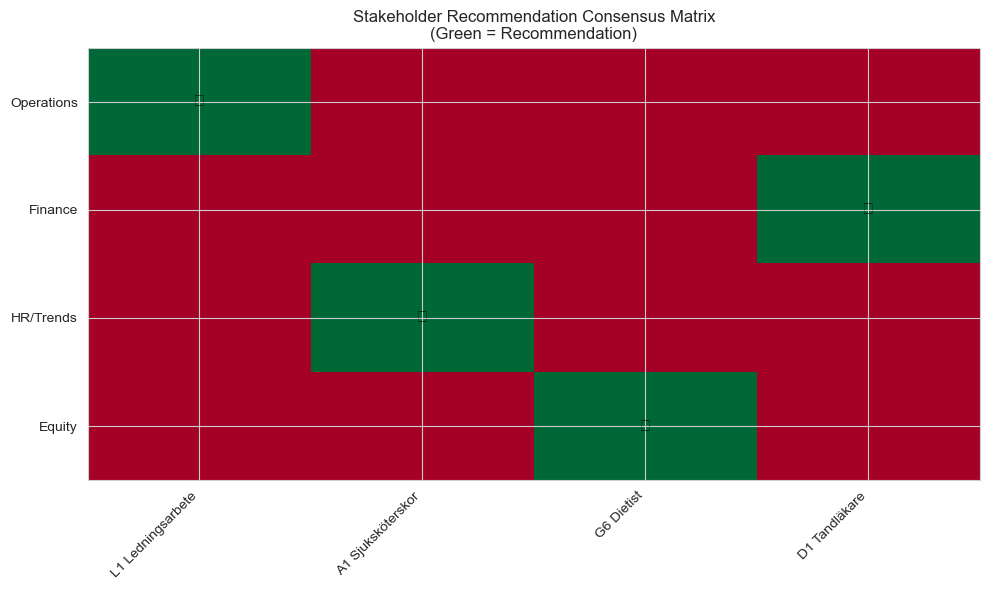

In [14]:
# Add after the analysis results
print("\n🎯 Stakeholder Recommendation Comparison:")
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Sick Leave Distribution
groups = df_analysis['group']
sick_leave = df_analysis['mean_sick_leave']
colors = ['red' if g == most_reliable['group'] else 'lightgray' for g in groups]
ax1.barh(groups, sick_leave, color=colors, alpha=0.7)
ax1.set_title('Operations View: Sick Leave by Group\n(Red = Lowest = Recommended)')
ax1.set_xlabel('Sick Leave Percentage')
ax1.axvline(df_analysis['mean_sick_leave'].mean(), color='red', linestyle='--', alpha=0.5, label='Average')
ax1.legend()

# 2. Cost Analysis
costs = df_analysis['annual_absence_cost'] / 1000  # Convert to thousands
cost_colors = ['green' if g == highest_cost['group'] else 'lightgray' for g in groups]
ax2.barh(groups, costs, color=cost_colors, alpha=0.7)
ax2.set_title('Finance View: Annual Absence Cost (SEK thousands)\n(Green = Highest Cost = Recommended)')
ax2.set_xlabel('Annual Cost (thousands SEK)')
ax2.axvline(costs.mean(), color='green', linestyle='--', alpha=0.5, label='Average')
ax2.legend()

# 3. Trend Analysis
trends = df_analysis['trend_2017_2018']
trend_colors = ['orange' if g == worst_trend['group'] else 'lightgray' for g in groups]
ax3.barh(groups, trends, color=trend_colors, alpha=0.7)
ax3.set_title('HR View: Sick Leave Trend 2017-2018\n(Orange = Worst Trend = Recommended)')
ax3.set_xlabel('Trend (Percentage Points Change)')
ax3.axvline(0, color='black', linestyle='-', alpha=0.8)
ax3.axvline(trends.mean(), color='orange', linestyle='--', alpha=0.5, label='Average')
ax3.legend()

# 4. Gender Gap Analysis
gaps = df_analysis['absence_gap_women_minus_men']
gap_colors = ['purple' if g == largest_gap['group'] else 'lightgray' for g in groups]
ax4.barh(groups, gaps, color=gap_colors, alpha=0.7)
ax4.set_title('Equity View: Gender Absence Gap (Women - Men)\n(Purple = Largest Gap = Recommended)')
ax4.set_xlabel('Absence Gap (Percentage Points)')
ax4.axvline(0, color='black', linestyle='-', alpha=0.8)
ax4.axvline(gaps.mean(), color='purple', linestyle='--', alpha=0.5, label='Average')
ax4.legend()

plt.tight_layout()
plt.show()

# Additional: Consensus visualization
print("\n🤝 Stakeholder Consensus Analysis:")
fig, ax = plt.subplots(figsize=(10, 6))
stakeholders = list(recommendations.keys())
recommended_groups = list(recommendations.values())

# Create a matrix showing which stakeholders recommend which groups
unique_groups = list(set(recommended_groups))
group_to_num = {group: i for i, group in enumerate(unique_groups)}

matrix_data = []
for stakeholder, group in recommendations.items():
    row = [0] * len(unique_groups)
    row[group_to_num[group]] = 1
    matrix_data.append(row)

im = ax.imshow(matrix_data, cmap='RdYlGn', aspect='auto')

ax.set_xticks(range(len(unique_groups)))
ax.set_xticklabels(unique_groups, rotation=45, ha='right')
ax.set_yticks(range(len(stakeholders)))
ax.set_yticklabels(stakeholders)

# Add value annotations
for i in range(len(stakeholders)):
    for j in range(len(unique_groups)):
        text = ax.text(j, i, '✓' if matrix_data[i][j] == 1 else '', 
                      ha="center", va="center", color="black", fontsize=12, fontweight='bold')

ax.set_title('Stakeholder Recommendation Consensus Matrix\n(Green = Recommendation)')
plt.tight_layout()
plt.show()

### Your Decision: Which Stakeholder Do You Agree With?

**Write a 300-word executive summary recommending:**
1. Which professional group should receive the 500,000 SEK investment?
2. Which stakeholder perspective do you prioritize and why?
3. What trade-offs are you making by choosing this group?
4. How would you present this decision to stakeholders who disagree?

**Deliverable Format:**
```
EXECUTIVE SUMMARY: Wellness Program Investment Decision

RECOMMENDATION: [Group Name]

FINANCIAL IMPACT:
- Current annual absence cost: [X] SEK
- Expected improvement (conservative estimate): [Y]%
- Projected 3-year savings: [Z] SEK

RATIONALE:
[Your justified reasoning - 2-3 paragraphs]

TRADE-OFFS:
[What you're NOT addressing and why]

IMPLEMENTATION RISKS:
[What could go wrong]
```

**Key Questions to Answer:**
- Why this group over the others?
- Is this decision robust (would it change if conditions slightly changed)?
- What additional information would make you more confident?

<div style='background-color:#F5F3FF;border-left:4px solid #8B5CF6;padding:16px;border-radius:8px;margin-bottom:16px;box-shadow:0 2px 4px rgba(0,0,0,0.1);'> <strong style='color:#7C3AED;font-size:1.2em;display:block;margin-bottom:12px;'>📋 Structured Reporting Framework</strong><p style='color:#4A5568;line-height:1.6;margin-bottom:16px;'>This code provides a professional template for crafting an executive summary that communicates data-driven insights to decision-makers. It demonstrates how Python can scaffold the reporting process while maintaining focus on analytical storytelling.</p><div style='background-color:#EDE9FE;padding:12px;border-radius:6px;margin:12px 0;border-left:3px solid #8B5CF6;'> <strong style='color:#6D28D9;'>📝 Multi-line String Template</strong> <ul style='margin:8px 0 8px 20px;color:#4A5568;'> <li><b>Triple Quotes <code>"""..."""</code></b>: Creates a multi-line string that preserves formatting, spaces, and line breaks exactly as written</li> <li><b>Template Structure</b>: Provides clear sections (Recommendation, Rationale, Trade-offs, Risk Assessment) to guide comprehensive analysis</li> <li><b>Placeholder Text</b>: <code>[Write your 300-word executive summary here]</code> indicates where students should insert their analysis</li> </ul> <p style='color:#4A5568;margin:8px 0;font-style:italic;">This approach treats the report template as a first-class data object that can be stored, manipulated, and displayed.</p> </div><div style='background-color:#E0E7FF;padding:12px;border-radius:6px;margin:12px 0;border-left:3px solid #4F46E5;'> <strong style='color:#3730A3;'>🔄 Immediate Feedback Loop</strong> <ul style='margin:8px 0 8px 20px;color:#4A5568;'> <li><b><code>print("📝 Your Executive Summary:")</code></b>: Clear labeling of the output section</li> <li><b><code>print(summary)</code></b>: Displays the template exactly as stored, providing instant visual feedback</li> <li><b>Iterative Development</b>: Students can run this cell repeatedly as they refine their analysis</li> </ul> </div><div style='background-color:#FEF7CD;padding:12px;border-radius:6px;margin:12px 0;border-left:3px solid #EAB308;'> <strong style='color:#854D0E;'>🎯 Professional Reporting Structure</strong> <p style='color:#4A5568;margin:8px 0;'><b>Key sections for comprehensive executive communication:</b></p> <ul style='margin:8px 0 8px 20px;color:#4A5568;'> <li><b>Executive Summary</b>: High-level overview of findings and implications</li> <li><b>Recommendation</b>: Clear, actionable decision statement</li> <li><b>Rationale</b>: Data-driven justification using analysis results</li> <li><b>Trade-offs</b>: Acknowledgment of stakeholder conflicts and compromises</li> <li><b>Risk Assessment</b>: Consideration of potential downsides and mitigation strategies</li> </ul> </div><div style='background-color:#DBEAFE;padding:12px;border-radius:6px;margin:12px 0;border-left:3px solid #3B82F6;'> <strong style='color:#1E40AF;'>💡 Pedagogical Design</strong> <ul style='margin:8px 0 8px 20px;color:#4A5568;'> <li><b>Scaffolded Learning</b>: Provides structure while allowing creative analysis</li> <li><b>Real-world Format</b>: Mirrors professional business reporting standards</li> <li><b>Focus on Communication</b>: Emphasizes translating technical analysis into business insights</li> <li><b>Integrated Workflow</b>: Keeps analysis and reporting within the same computational environment</li> </ul> </div><div style='background-color:#DCFCE7;padding:12px;border-radius:6px;margin:12px 0;border-left:3px solid #16A34A;'> <strong style='color:#166534;'>🚀 Next Steps for Students</strong> <ul style='margin:8px 0 8px 20px;color:#4A5568;"> <li><b>Replace Placeholders</b>: Insert specific findings from the analysis</li> <li><b>Reference Data</b>: Use exact numbers from the stakeholder recommendations</li> <li><b>Address Conflicts</b>: Discuss how to handle situations where stakeholders disagree</li> <li><b>Justify Decisions</b>: Explain the reasoning behind the final recommendation</li> </ul> </div></div>

In [ ]:
# ✏️ SPACE FOR YOUR EXECUTIVE SUMMARY (text your analysis below)

summary = """
[Write your 300-word executive summary here]

RECOMMENDATION: ________

RATIONALE:
...

TRADE-OFFS:
...

RISK ASSESSMENT:
...
"""

print("📝 Your Executive Summary:")
print(summary)

---

### 🎯 Scenario 2.2: Staffing Mix Optimization

**Business Context:**
You have 300,000 SEK monthly budget. Should you hire more **Nurses** or **Doctors**?

**The Challenge:**
They have very different cost-to-reliability profiles:
- Nurses: Affordable but higher sick leave
- Doctors: Expensive but more reliable

**Your Analysis:**
Calculate "cost per effective FTE" for different staffing mixes.

```
Effective FTE = N × (1 - sick_leave% / 100)
Cost per Effective FTE = Total Monthly Cost / Effective FTE
```

**Lower cost per effective FTE = Better value**

<div style='background-color:#F5F3FF;border-left:4px solid #8B5CF6;padding:16px;border-radius:8px;margin-bottom:16px;box-shadow:0 2px 4px rgba(0,0,0,0.1);'> <strong style='color:#7C3AED;font-size:1.2em;display:block;margin-bottom:12px;'>🏥 Healthcare Staffing Optimization</strong><p style='color:#2D3748;line-height:1.6;margin-bottom:16px;'>This analysis compares different staffing models for healthcare delivery, examining the trade-offs between cost, capacity, and service capabilities when choosing between nurses and doctors.</p><div style='background-color:#EDE9FE;padding:12px;border-radius:6px;margin:12px 0;border-left:3px solid #8B5CF6;'> <strong style='color:#6D28D9;'>🎯 Data Extraction & Preparation</strong> <ul style='margin:8px 0 8px 20px;color:#2D3748;"> <li><b>Boolean Filtering</b>: Uses multiple conditions with <code>&</code> to extract specific professional groups and gender combinations</li> <li><b><code>.mean()</code></b>: Calculates average salary and sick leave rates for each profession</li> <li><b>Effective Rate Calculation</b>: <code>100 - sick_leave_percent</code> shows actual working capacity</li> </ul> </div><div style='background-color:#E0E7FF;padding:12px;border-radius:6px;margin:12px 0;border-left:3px solid #4F46E5;'> <strong style='color:#3730A3;'>💰 Staffing Model Calculations</strong> <p style='color:#2D3748;margin:8px 0;"><b>Key formulas for staffing optimization:</b></p> <ul style='margin:8px 0 8px 20px;color:#2D3748;"> <li><b>Staff Count</b>: <code>budget / salary</code> determines how many professionals can be hired</li> <li><b>Effective FTE</b>: <code>staff_count × (1 - sick_leave/100)</code> accounts for absence rates</li> <li><b>Cost per FTE</b>: <code>total_cost / effective_FTE</code> measures efficiency of each model</li> </ul> </div><div style='background-color:#FEF7CD;padding:12px;border-radius:6px;margin:12px 0;border-left:3px solid #EAB308;'> <strong style='color:#854D0E;'>📊 Comparative Analysis Framework</strong> <ul style='margin:8px 0 8px 20px;color:#2D3748;"> <li><b>Extreme Scenarios</b>: Pure nurse-only and doctor-only models establish performance boundaries</li> <li><b>Mixed Model</b>: Demonstrates balanced approach with complementary skills</li> <li><b>Service Type Consideration</b>: Links staffing mix to healthcare service capabilities</li> </ul> </div><div style='background-color:#DBEAFE;padding:12px;border-radius:6px;margin:12px 0;border-left:3px solid #3B82F6;'> <strong style='color:#1E40AF;'>🎯 Optimization & Decision Making</strong> <ul style='margin:8px 0 8px 20px;color:#2D3748;"> <li><b><code>.idxmin()</code></b>: Identifies the most cost-effective option automatically</li> <li><b>Multi-criteria Evaluation</b>: Considers both financial efficiency and service quality</li> <li><b>Interactive Design</b>: Encourages students to create their own optimal staffing mix</li> </ul> </div> </div>

In [17]:

print("=" * 70)
print("SCENARIO 2.2: STAFFING MIX OPTIMIZATION")
print("=" * 70)

# Get Nurses and Doctors data
nurses_data = merged[(merged['group'] == 'A1 Sjuksköterskor') & 
                      (merged['gender'] == 'Both')].mean(numeric_only=True)
doctors_data = merged[(merged['group'] == 'C1 Läkare') & 
                       (merged['gender'] == 'Both')].mean(numeric_only=True)

nurse_salary = nurses_data['salary_sek']
nurse_sl = nurses_data['sick_leave_percent']

doctor_salary = doctors_data['salary_sek']
doctor_sl = doctors_data['sick_leave_percent']

print(f"\n📊 KEY METRICS:")
print(f"   Nurses:")
print(f"      Salary: {nurse_salary:,.0f} SEK/month")
print(f"      Sick leave: {nurse_sl:.1f}%")
print(f"      Effective rate: {100 - nurse_sl:.1f}%")

print(f"\n   Doctors:")
print(f"      Salary: {doctor_salary:,.0f} SEK/month")
print(f"      Sick leave: {doctor_sl:.1f}%")
print(f"      Effective rate: {100 - doctor_sl:.1f}%")

budget = 300000

# Calculate different staffing options
options = []

# Option A: All Nurses
num_nurses_a = budget / nurse_salary
effective_fte_a = num_nurses_a * (1 - nurse_sl / 100)
cost_per_fte_a = budget / effective_fte_a

options.append({
    'Option': 'A: Nurses Only',
    'Nurses': int(num_nurses_a),
    'Doctors': 0,
    'Total Cost': budget,
    'Effective FTE': round(effective_fte_a, 2),
    'Cost per Effective FTE': round(cost_per_fte_a, 0),
    'Service Type': 'Primary care, routine procedures'
})

# Option B: All Doctors
num_doctors_b = budget / doctor_salary
effective_fte_b = num_doctors_b * (1 - doctor_sl / 100)
cost_per_fte_b = budget / effective_fte_b

options.append({
    'Option': 'B: Doctors Only',
    'Nurses': 0,
    'Doctors': int(num_doctors_b),
    'Total Cost': budget,
    'Effective FTE': round(effective_fte_b, 2),
    'Cost per Effective FTE': round(cost_per_fte_b, 0),
    'Service Type': 'Specialized care, complex procedures'
})

# Option C: Mixed model (your design)
# Example: 6 nurses + 2 doctors
mixed_nurses_c = 6
mixed_doctors_c = 2
mixed_cost = (mixed_nurses_c * nurse_salary) + (mixed_doctors_c * doctor_salary)
mixed_effective = (mixed_nurses_c * (1 - nurse_sl/100)) + (mixed_doctors_c * (1 - doctor_sl/100))
mixed_cost_per_fte = mixed_cost / mixed_effective

options.append({
    'Option': 'C: Mixed (6N + 2D)',
    'Nurses': mixed_nurses_c,
    'Doctors': mixed_doctors_c,
    'Total Cost': int(mixed_cost),
    'Effective FTE': round(mixed_effective, 2),
    'Cost per Effective FTE': round(mixed_cost_per_fte, 0),
    'Service Type': 'Primary + specialized'
})

df_options = pd.DataFrame(options)

print(f"\n💼 STAFFING OPTIONS:")
display(df_options)

print(f"\n🎯 ANALYSIS:")
best_value = df_options.loc[df_options['Cost per Effective FTE'].idxmin()]
print(f"   Best value (lowest cost per FTE): {best_value['Option']}")
print(f"   Cost per effective FTE: {best_value['Cost per Effective FTE']:,.0f} SEK")

print(f"\n✏️ YOUR TURN:")
print(f"   Design your own Option D (mixed staffing model)")
print(f"   Budget limit: {budget:,} SEK")
print(f"   Constraints: ")
print(f"      - Must stay within budget")
print(f"      - Consider service mix (primary vs. specialized)")
print(f"      - What's your goal? (lowest cost, highest capacity, specific service profile)")

SCENARIO 2.2: STAFFING MIX OPTIMIZATION

📊 KEY METRICS:
   Nurses:
      Salary: 35,177 SEK/month
      Sick leave: 8.9%
      Effective rate: 91.1%

   Doctors:
      Salary: 61,331 SEK/month
      Sick leave: 4.9%
      Effective rate: 95.1%

💼 STAFFING OPTIONS:


,Option,Nurses,Doctors,Total Cost,Effective FTE,Cost per Effective FTE,Service Type
0,A: Nurses Only,8,0,300000,7.77,38620.0,"Primary care, routine procedures"
1,B: Doctors Only,0,4,300000,4.65,64510.0,"Specialized care, complex procedures"
2,C: Mixed (6N + 2D),6,2,333723,7.37,45302.0,Primary + specialized



🎯 ANALYSIS:
   Best value (lowest cost per FTE): A: Nurses Only
   Cost per effective FTE: 38,620 SEK

✏️ YOUR TURN:
   Design your own Option D (mixed staffing model)
   Budget limit: 300,000 SEK
   Constraints: 
      - Must stay within budget
      - Consider service mix (primary vs. specialized)
      - What's your goal? (lowest cost, highest capacity, specific service profile)


### 🎯 Scenario 2.3: Gender Pay Equity vs. Absence Management Dilemma

**The Dilemma:**
HR has budget for ONE initiative. Address **gender pay gap** OR **gender absence gap**?

**The Data Shows:**
- Gender ABSENCE gap: Women average [X]% higher sick leave
- Gender PAY gap: Men average [Y]% higher salary

**Your Decision:**
Which inequality is more urgent to address?

<div style='background-color:#f8f9fa;border-left:4px solid #d97706;padding:12px;border-radius:6px;margin-bottom:6px;'>
<strong style='color:#d97706;font-size:1.05em;'>⚖️ Scenario 2.3 equity dilemma mechanics</strong>
<ul style='margin: 5px 0 0 20px; padding: 0;'>
<li><b><b><code>.iloc</code></b></b> fetches the first Women/Men row per group, then arithmetic crafts absence/pay gaps appended to a list-of-dicts.
<b><code>pd.DataFrame</code></b> summarizes gaps, <b><code>.mean</code></b> aggregates totals, and <b><code>print</code></b> ties the quantitative stats back to the Equity Officer narrative.
</div></li>
</ul>
</div>

In [ ]:
print("=" * 70)
print("SCENARIO 2.3: EQUITY DILEMMA - Pay Gap vs. Absence Gap")
print("=" * 70)

# Calculate gender gaps across all groups
gender_analysis = []

for group in sorted(merged['group'].unique()):
    group_data = merged[merged['group'] == group]
    
    women = group_data[group_data['gender'] == 'Women'].iloc[0] if len(group_data[group_data['gender'] == 'Women']) > 0 else None
    men = group_data[group_data['gender'] == 'Men'].iloc[0] if len(group_data[group_data['gender'] == 'Men']) > 0 else None
    
    if women is not None and men is not None:
        absence_gap = women['sick_leave_percent'] - men['sick_leave_percent']
        pay_gap_sek = men['salary_sek'] - women['salary_sek']
        pay_gap_pct = (pay_gap_sek / women['salary_sek'] * 100) if women['salary_sek'] > 0 else 0
        
        gender_analysis.append({
            'Group': group,
            'Women Sick Leave %': round(women['sick_leave_percent'], 1),
            'Men Sick Leave %': round(men['sick_leave_percent'], 1),
            'Absence Gap (W-M)': round(absence_gap, 1),
            'Women Salary': int(women['salary_sek']),
            'Men Salary': int(men['salary_sek']),
            'Pay Gap SEK (M-W)': int(pay_gap_sek),
            'Pay Gap %': round(pay_gap_pct, 1)
        })

df_gender = pd.DataFrame(gender_analysis)

print("\n📊 GENDER GAPS BY PROFESSIONAL GROUP:")
display(df_gender.round(1))

# Calculate totals
total_absence_gap = df_gender['Absence Gap (W-M)'].mean()
total_pay_gap = df_gender['Pay Gap SEK (M-W)'].mean()
total_pay_gap_pct = df_gender['Pay Gap %'].mean()

print(f"\n📈 SUMMARY STATISTICS:")
print(f"   Average absence gap (Women - Men): {total_absence_gap:+.1f} percentage points")
print(f"   Average pay gap (Men - Women): {total_pay_gap:+,.0f} SEK ({total_pay_gap_pct:+.1f}%)")

print(f"\n⚖️ EQUITY OFFICER'S ANALYSIS:")
print(f"\n   Absence Gap Problem:")
print(f"   - Women have {total_absence_gap:.1f} percentage points HIGHER sick leave")
print(f"   - This affects: staffing planning, career advancement perceptions")
print(f"   - Intervention: Occupational health for women's wellbeing")
print(f"   - Feasibility: Can design targeted health programs")

print(f"\n   Pay Gap Problem:")
print(f"   - Men have {total_pay_gap_pct:.1f}% HIGHER median salaries")
print(f"   - This affects: lifetime earnings, pension, career equity")
print(f"   - Intervention: Salary adjustment or career progression support")
print(f"   - Feasibility: Costly, requires budget/policy changes")

print(f"\n💡 YOUR DECISION:")
print(f"   Which gap do you prioritize and why?")
print(f"   Can you partially address both with creative solutions?")

---

## 🎁 BONUS: Normalization Preview (for Workshop 3)

When we combine different metrics with different units, we need to normalize them for fair comparison.

**Example:** Comparing a metric measured in percentages (0-100) with a metric measured in thousands of SEK (0-100,000+).

**Solution:** Z-score normalization (you'll learn this formally in Workshop 3).

```
Normalized Value = (Original Value - Mean) / Standard Deviation
```

**Result:** All metrics are now in "standard deviations from the mean" - a comparable unit.

<div style='background-color:#f8f9fa;border-left:4px solid #7e22ce;padding:12px;border-radius:6px;margin-bottom:6px;'>
<strong style='color:#7e22ce;font-size:1.05em;'>📈 Normalization preview strategy</strong>
<ul style='margin: 5px 0 0 20px; padding: 0;'>
<li><b><b><code>.copy()</code></b></b> isolates metrics, <b><code>for col in [...]</code></b> loops through columns, and simple arithmetic using <b><code>.mean()</code></b> and <b><code>.std()</code></b> delivers z-scores.
<b><code>print()</code></b> contrasts raw vs. normalized figures so students appreciate unified scales for fair comparisons.
</div></li>
</ul>
</div>

In [ ]:
# Quick preview of normalization
print("=" * 70)
print("PREVIEW: NORMALIZATION FOR FAIR COMPARISON")
print("=" * 70)

# Select key metrics
metrics_to_normalize = df_analysis[['group', 'mean_sick_leave', 'median_salary', 'annual_absence_cost']].copy()

# Calculate z-scores
for col in ['mean_sick_leave', 'median_salary', 'annual_absence_cost']:
    mean = metrics_to_normalize[col].mean()
    std = metrics_to_normalize[col].std()
    metrics_to_normalize[f'z_{col}'] = (metrics_to_normalize[col] - mean) / std

print("\n📊 BEFORE NORMALIZATION:")
print(metrics_to_normalize[['group', 'mean_sick_leave', 'median_salary', 'annual_absence_cost']].round(0))

print("\n📊 AFTER NORMALIZATION (Z-SCORES):")
print(metrics_to_normalize[['group', 'z_mean_sick_leave', 'z_median_salary', 'z_annual_absence_cost']].round(2))

print("\n💡 KEY INSIGHT:")
print("   Z-scores now on same scale (typically -2 to +2)")
print("   Allows fair comparison of different metrics")
print("   Foundation for weighted scoring (Workshop 3)")

---

## ✅ Workshop 2 Deliverables

**Submit (if required):**
1. ✅ Completed Jupyter notebook with all scenarios
2. ✅ Executive summary (Scenario 2.1) - 300 words
3. ✅ Staffing mix analysis (Scenario 2.2) - your Option D design
4. ✅ Equity dilemma reflection (Scenario 2.3) - which gap do you prioritize?
5. ✅ **Synthesis reflection:** "When data conflicts, how do I decide which perspective to trust?"

**Self-Assessment Checklist:**
- [ ] I can load and merge two Excel datasets with different structures
- [ ] I understand how to diagnose merge failures
- [ ] I can identify when different datasets lead to conflicting recommendations
- [ ] I can analyze trade-offs from multiple stakeholder perspectives
- [ ] I understand that "data-driven" doesn't mean "data decides" - judgment matters
- [ ] I'm ready for Workshop 3 (MCDA methods to systematize complex trade-offs)

---

## 🎓 Reflection: From Data to Decision

**Key Insight:** Real business decisions are rarely "data decides the answer." Instead:

1. **Data informs** different perspectives
2. **Stakeholders** interpret data through their roles (Finance = ROI, Operations = reliability, etc.)
3. **Managers** synthesize these perspectives and make a judgment call
4. **Trade-offs** are inevitable - you can't maximize everything
5. **Justification** is what matters - explaining your reasoning (not claiming perfection)

This is where **Workshop 3** comes in. We'll learn formal methods (MCDA) that systematically handle conflicting criteria. But no method removes the need for judgment.

**Looking Ahead:** In Workshop 3, you'll apply these same scenarios using structured decision models that weight criteria systematically. You'll see that models are tools for organizing thinking, not replacements for it.
